 this analysis targeting to the public audience to raise the awareness of heart diseases
 there's a lot of main questions we wanna find the answer for them 
 sush as
- 1. Which demographic groups (age, gender) are more prone to heart disease in this dataset? what's about them all (age,gender,has the desease)
- 2. At what age range does the incidence of heart disease begin to rise significantly?
- 3. How do cholesterol levels correlate with the risk of heart disease?
- 4. Is there a noticeable difference in heart disease rates between smokers and non smokers?
- 5. Does regular physical activity appear to offer protection against CVD, and to what extent?
- 6. How strongly does elevated blood pressure (systolic or diastolic) link to heart disease compared to other factors?
- 7. Do men or women have higher disease rates, and does that gap change with age or other risk factors?
- 8. Which factor (age, cholesterol, blood pressure, smoking, etc.) seems the strongest predictor of heart disease, based on your analysis?
- 9. Are there any surprising or less-common factors in the data that might still have a measurable impact on CVD?
- 10. What preventative or lifestyle measures (quitting smoking, managing cholesterol,staying active) does the data most clearly suggest?


By focusing on these questions, you’ll be able to build a coherent data story—one that
highlights the most relevant risk indicators, addresses real concerns (such as age-onset or
lifestyle impacts), and ultimately educates or advises on how to mitigate the likelihood of
heart disease.

# ***data overview***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 7)
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.facecolor']='#FFE5B4'

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb
import joblib


In [2]:
df=pd.read_csv('/kaggle/input/cardiovascular/cardio_train.csv')
print(f'shape : {df.shape}')
df.tail()

shape : (70000, 13)


id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993  19240       2     168      76    120     80            1     1   
69996  99995  22601       1     158     126    140     90            2     2   
69997  99996  19066       2     183     105    180     90            3     1   
69998  99998  22431       1     163      72    135     80            1     2   
69999  99999  20540       1     170      72    120     80            2     1   

       smoke  alco  active  cardio  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB


In [4]:
df.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205543   
std    28851.302323   2467.251667      0.476838      8.210126     14.395829   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

- ther's a lot of outliers here

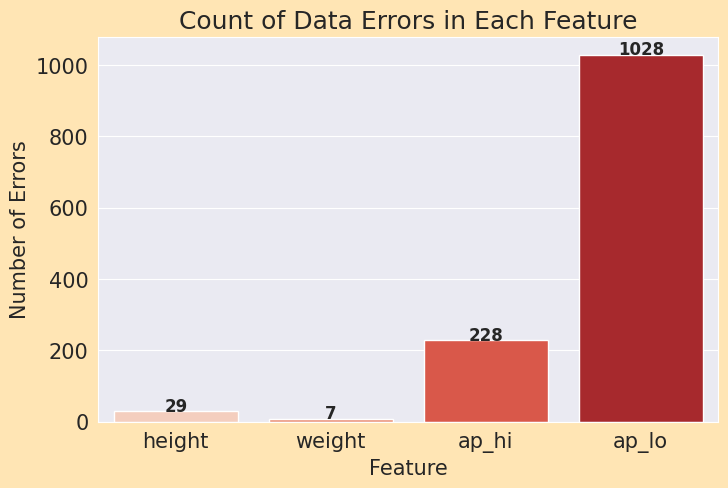

In [5]:
# Define expected normal ranges for each column
error_conditions = {
    'height': (100, 250),   
    'weight': (30, 200),    
    'ap_hi': (50, 250),     
    'ap_lo': (30, 150)      
}
# Count errors for each column
error_counts = {}
for col, (low, high) in error_conditions.items():
    error_counts[col] = ((df[col] < low) | (df[col] > high)).sum()

error_df = pd.DataFrame(list(error_counts.items()), columns=['Feature', 'Error Count'])

plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Feature', y='Error Count', data=error_df, palette='Reds')

# Annotate bars with exact error counts
for index, row in error_df.iterrows():
    ax.text(index, row['Error Count'] + 1, str(row['Error Count']), ha='center', fontsize=12, fontweight='bold')

plt.xlabel('Feature')
plt.ylabel('Number of Errors')
plt.title('Count of Data Errors in Each Feature')

plt.show()


In [6]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Age']=df['age']//365

In [9]:
df.sample()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69724  99583  21811       1     162      74    130     90            1     1   

       smoke  alco  active  cardio  Age  
69724      0     0       1       1   59

# ***Uninvaruate Analysis***

In [10]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168      62    110     80            1     1      0   
1   1  20228       1     156      85    140     90            3     1      0   
2   2  18857       1     165      64    130     70            3     1      0   
3   3  17623       2     169      82    150    100            1     1      0   
4   4  17474       1     156      56    100     60            1     1      0   

   alco  active  cardio  Age  
0     0       1       0   50  
1     0       1       1   55  
2     0       0       1   51  
3     0       1       1   48  
4     0       0       0   47

- all out numeric values are continous
- the encoded features means that it was categorical in first place 

- because of outliers we will work on separate columns and try to fix it 

## ***Numeric Analysis***

### Age

In [11]:
df.Age.describe()

count    70000.000000
mean        52.840671
std          6.766774
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: Age, dtype: float64

- mean is nearly equal to median so maybe there's no outliers but let's check

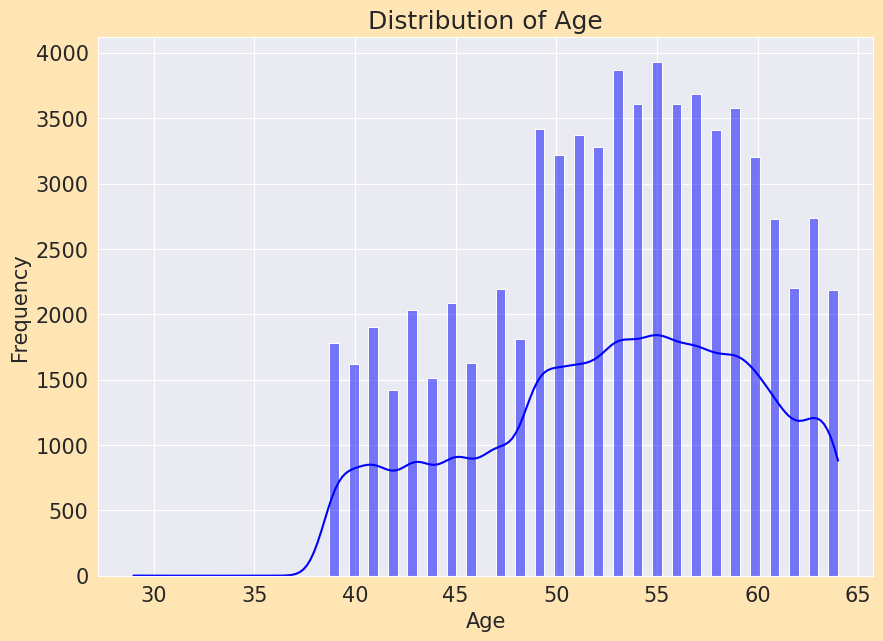

In [12]:
iqr=np.percentile(df['Age'],75)-np.percentile(df['Age'],25)
bin_width_fd =2*iqr/np.cbrt(len(df['Age']))
bins_fd = max(1, int((np.max(df['Age']) - np.min(df['Age'])) / bin_width_fd))  # Ensure at least 1 bin
sns.histplot(df['Age'],bins=bins_fd,kde=True,color='blue')
plt.title(f'Distribution of Age')
plt.xlabel('Age')
plt.ylabel("Frequency")
plt.show()

- identifing outliers

In [13]:
q1=np.percentile(df['Age'],25)
q3=np.percentile(df['Age'],75)
iqr=q3-q1
lower_bound = q1 - (1.5*iqr)
upper_bound =q3 + (1.5*iqr)
outliers=df[(df['Age']<lower_bound) |(df['Age']> upper_bound) ]
outliers

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
6219    8850  10878       1     175      59    120     80            1     1   
22343  31922  10798       2     175      92    100     60            1     1   
30666  43842  10859       1     159      59    120     80            1     1   
55905  79749  10964       1     160      59    110     70            1     1   

       smoke  alco  active  cardio  Age  
6219       0     0       1       0   29  
22343      0     0       1       0   29  
30666      0     0       1       0   29  
55905      0     0       1       0   30

- outliers looks like real values not errors so we keep them

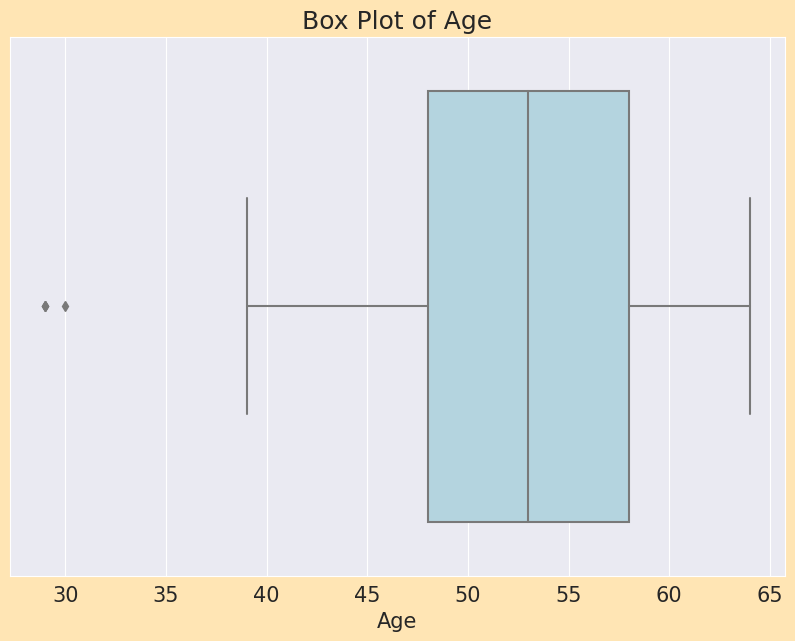

In [14]:
sns.boxplot(x=df['Age'], color="lightblue")
plt.title(f'Box Plot of Age')
plt.xlabel('Age')
plt.show()

### height

In [15]:
df.height.describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

- see the diffrence between the mean and median

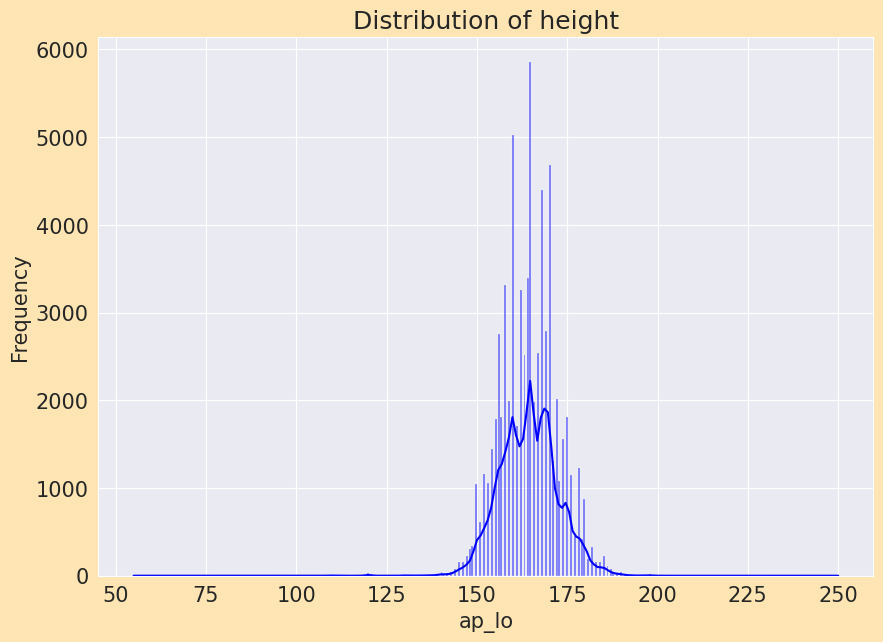

In [16]:
iqr=np.percentile(df['height'],75)-np.percentile(df['height'],25)
bin_width_fd =2*iqr/np.cbrt(len(df['height']))
bins_fd = max(1, int((np.max(df['height']) - np.min(df['height'])) / bin_width_fd))  # Ensure at least 1 bin
sns.histplot(df['height'],bins=bins_fd,kde=True,color='blue')
plt.title(f'Distribution of height')
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()

- there's outliers effects the ditribution

In [17]:
backup=df.copy()
q1=np.percentile(df['height'],25)
q3=np.percentile(df['height'],75)
iqr=q3-q1
lower_bound = q1 - (1.5*iqr)
upper_bound =q3 + (1.5*iqr)
outliers=df[(df['height']<lower_bound) |(df['height']> upper_bound) ]
print(upper_bound,lower_bound)
outliers

186.5 142.5


id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
62        81  20330       2     187     115    130     90            1     1   
76       105  20397       2     188     105    120     80            1     1   
224      309  21800       2      76      55    120     80            1     1   
249      343  18220       1     142      61    120     80            1     1   
781     1086  23301       1     141      60    120     80            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69430  99172  19040       1     140      52    150     80            2     1   
69475  99226  19261       2     187      73    120     80            1     3   
69589  99401  18286       2     192      83    110     70            1     1   
69784  99673  17541       1     141      44    100     70            1     1   
69873  99799  19736       2     188     108    130     80            2     2   

       smoke  alco  active  cardio  Age  
62         0     1       1       0   55  
76         0     0       1       1   55  
224        0     0       1       0   59  
249        0     0       1       0   49  
781        0     0       1       1   63  
...      ...   ...     ...     ...  ...  
69430      0     0       1       1   52  
69475      0     0       1       0   52  
69589      0     1       0       0   50  
69784      0     0       1       0   48  
69873      0     1       0       1   54  

[519 rows x 14 columns]

In [18]:
df[(df['height']<100) ]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
224      309  21800       2      76      55    120     80            1     1   
7598   10843  14661       2      70      72    120      8            1     1   
8171   11662  17646       2      97     170    160    100            1     1   
12770  18218  19594       1      75     168    120     80            1     1   
13265  18928  22456       2      71      68    120     80            3     1   
14323  20459  22005       1      67      57    120     90            1     1   
15167  21686  15812       1      70      68    120     80            1     1   
16699  23859  19680       2      74      98    140     90            1     1   
17277  24690  17530       1      98      45     12     80            1     1   
22542  32207  14538       1      68      65    100     60            1     1   
22723  32456  23386       1      55      81    130     90            1     1   
23913  34186  19074       1      81     156    140     90            1     1   
27384  39156  15292       1      80     178    140     90            3     3   
27603  39462  20978       1      64      61    130     70            1     1   
28737  41075  19747       1      91      55    140     90            1     1   
29157  41661  19088       1      60      69    110     70            1     1   
32098  45832  15374       1      72      74    150     90            1     1   
33607  48009  19709       2      65      72    130     80            1     1   
44490  63545  19120       1      65      60    120     80            1     1   
46319  66161  21006       2      68      71    120     80            1     1   
47352  67631  23297       1      75      75    120     80            1     1   
50789  72476  14499       2      67      60    110     80            1     1   
51459  73386  15432       2      70      69    120     80            1     1   
53344  76116  20541       2      67      80    120     80            1     1   
56022  79917  21171       1      96      59     90     60            1     1   
64115  91523  18426       1      59      58    125     67            1     1   
64454  92008  21348       1      66      63     12     80            1     1   
65302  93223  18467       1      99      60     90     60            1     1   
66643  95141  18830       1      57      61    130     90            1     1   

       smoke  alco  active  cardio  Age  
224        0     0       1       0   59  
7598       0     0       1       0   40  
8171       1     0       1       1   48  
12770      1     0       1       1   53  
13265      0     0       1       0   61  
14323      0     0       1       1   60  
15167      0     0       0       0   43  
16699      0     0       1       1   53  
17277      0     0       1       0   48  
22542      0     0       0       0   39  
22723      0     0       1       1   64  
23913      0     0       1       0   52  
27384      0     0       1       1   41  
27603      0     0       1       0   57  
28737      0     0       1       1   54  
29157      0     0       0       0   52  
32098      0     0       1       1   42  
33607      0     0       0       0   53  
44490      0     0       1       0   52  
46319      0     0       1       0   57  
47352      0     0       1       0   63  
50789      1     1       1       0   39  
51459      0     0       0       0   42  
53344      0     0       0       1   56  
56022      0     0       1       1   58  
64115      0     0       0       0   50  
64454      0     0       0       1   58  
65302      0     0       1       0   50  
66643      0     0       1       1   51

- this values has to be errors
- i think they minused by 100

In [19]:
df.loc[df['height'] < 100, 'height'] += 100

In [20]:
df[(df['height']>100) & (df['height']<120) ]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
7116   10142  20579       2     117      78    150     90            1     1   
8677   12381  19698       2     119      89    160     90            1     1   
11230  16062  18307       1     110      90    120     80            1     1   
20028  28605  19777       1     112     167    180    120            1     1   
28897  41289  18961       1     110     105    140     90            2     1   
29735  42508  17453       1     109      64    140     80            3     1   
34364  49098  21888       2     110      70    110     70            1     1   
37388  53389  22051       1     105      72    120     70            1     3   
39543  56496  14606       1     108      70    140     90            1     1   
41807  59712  23319       1     109      68    120     80            1     1   
45091  64394  18130       1     110      70    110     70            1     1   
45358  64802  19834       1     104     159    200    100            3     1   
46043  65775  18739       1     111      69    130     90            1     1   
50136  71547  23422       1     113      73    120     80            1     1   
59625  85128  17643       1     104     165    120     80            1     1   
59738  85294  16970       2     110      68    110     70            2     1   
59960  85605  21227       2     117      70    110     60            1     1   
60691  86640  17377       1     110      70    110     70            1     1   
64787  92478  23476       1     105      80    130     90            1     1   
66479  94906  16928       2     110      90    110     90            1     1   

       smoke  alco  active  cardio  Age  
7116       1     0       1       1   56  
8677       0     0       1       1   53  
11230      0     0       1       0   50  
20028      0     1       1       0   54  
28897      0     0       1       1   51  
29735      0     0       1       1   47  
34364      0     0       1       1   59  
37388      0     0       1       0   60  
39543      0     0       1       1   40  
41807      0     0       1       1   63  
45091      0     0       1       0   49  
45358      0     0       0       1   54  
46043      0     0       1       1   51  
50136      0     0       0       0   64  
59625      0     0       1       0   48  
59738      0     0       1       0   46  
59960      0     0       1       1   58  
60691      0     0       1       1   47  
64787      0     0       1       1   64  
66479      0     0       1       0   46

In [21]:
# drop

In [22]:
df[(df['height']>200) ]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
6486    9223  21220       1     250      86    140    100            3     1   
21628  30894  19054       2     207      78    100     70            1     1   

       smoke  alco  active  cardio  Age  
6486       0     0       1       1   58  
21628      0     1       1       0   52

- 250 i think it's an outlier not an error

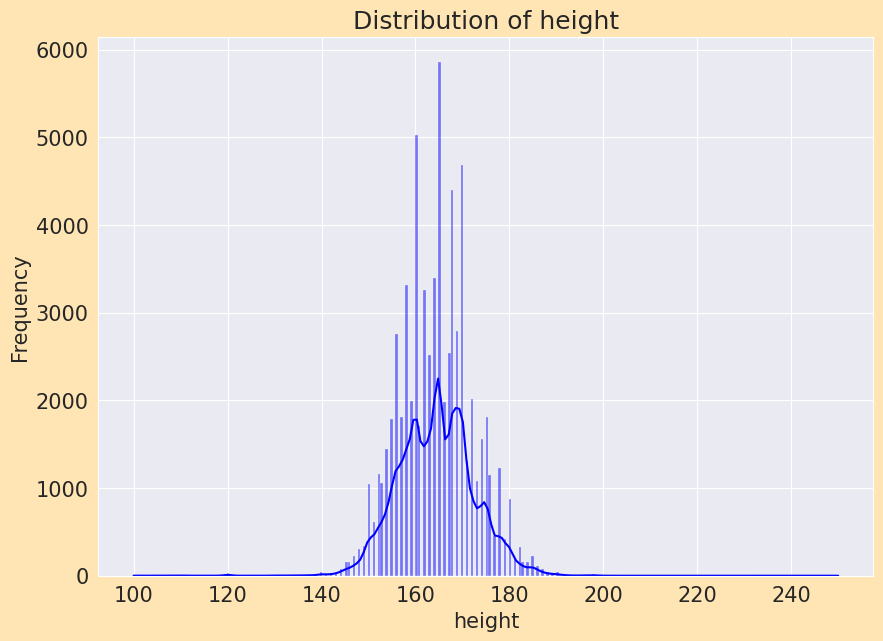

In [23]:
iqr=np.percentile(df['height'],75)-np.percentile(df['height'],25)
bin_width_fd =2*iqr/np.cbrt(len(df['height']))
bins_fd = max(1, int((np.max(df['height']) - np.min(df['height'])) / bin_width_fd))  # Ensure at least 1 bin
sns.histplot(df['height'],bins=bins_fd,kde=True,color='blue')
plt.title(f'Distribution of height')
plt.xlabel('height')
plt.ylabel("Frequency")
plt.show()

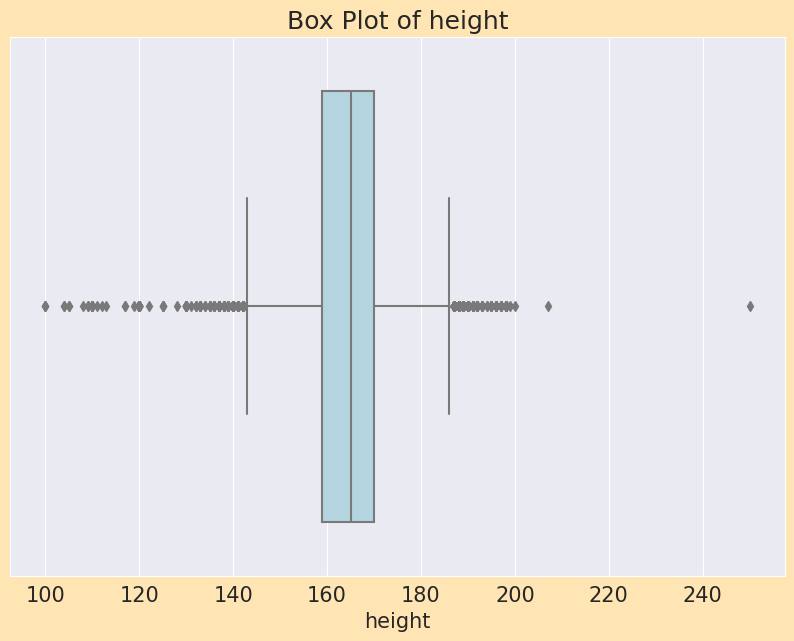

In [24]:
sns.boxplot(x=df['height'], color="lightblue")
plt.title(f'Box Plot of height')
plt.xlabel('height')
plt.show()

### weight

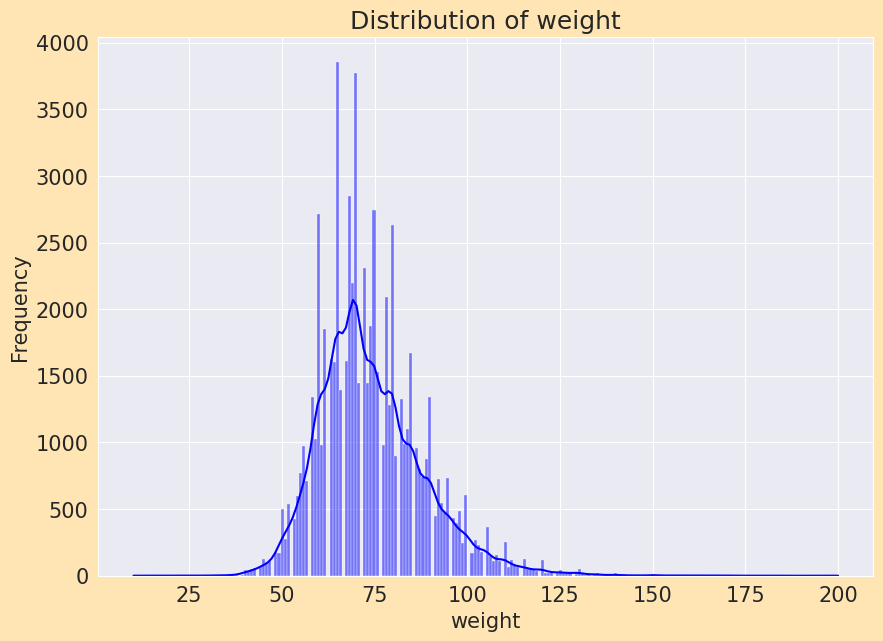

In [25]:
iqr=np.percentile(df['weight'],75)-np.percentile(df['weight'],25)
bin_width_fd =2*iqr/np.cbrt(len(df['weight']))
bins_fd = max(1, int((np.max(df['weight']) - np.min(df['weight'])) / bin_width_fd))  # Ensure at least 1 bin
sns.histplot(df['weight'],bins=bins_fd,kde=True,color='blue')
plt.title(f'Distribution of weight')
plt.xlabel('weight')
plt.ylabel("Frequency")
plt.show()

In [26]:
q1=np.percentile(df['weight'],25)
q3=np.percentile(df['weight'],75)
iqr=q3-q1
lower_bound = q1 - (1.5*iqr)
upper_bound =q3 + (1.5*iqr)
outliers=df[(df['weight']<lower_bound) |(df['weight']> upper_bound) ]
print(lower_bound,upper_bound)
outliers


39.5 107.5


id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
15        24  16782       2     172     112    120     80            1     1   
62        81  20330       2     187     115    130     90            1     1   
83       114  19570       1     152     110    160     90            1     1   
196      267  22675       1     176     108    140     90            1     1   
267      366  17460       1     165     115    150    100            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69873  99799  19736       2     188     108    130     80            2     2   
69946  99925  21333       1     164     115    130     80            1     1   
69947  99930  23305       2     172     113    110     80            1     1   
69981  99972  17500       2     182     110    130     90            2     2   
69996  99995  22601       1     158     126    140     90            2     2   

       smoke  alco  active  cardio  Age  
15         0     0       0       1   45  
62         0     1       1       0   55  
83         0     0       1       1   53  
196        0     0       0       0   62  
267        0     0       1       1   47  
...      ...   ...     ...     ...  ...  
69873      0     1       0       1   54  
69946      0     0       1       1   58  
69947      0     0       0       1   63  
69981      0     0       1       1   47  
69996      0     0       1       1   61  

[1819 rows x 14 columns]

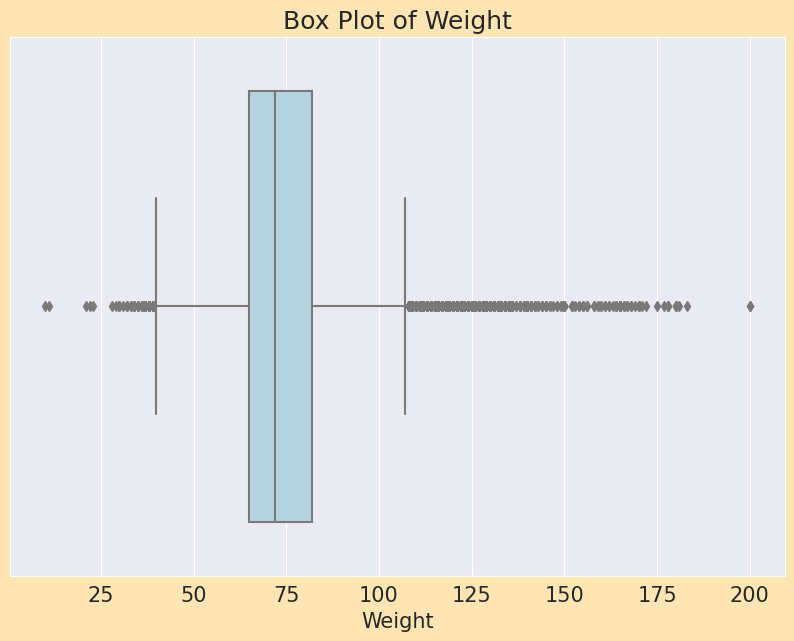

In [27]:
sns.boxplot(x=df['weight'], color="lightblue")
plt.title(f'Box Plot of Weight')
plt.xlabel('Weight')
plt.show()

- there's a lot of outliers here but it may be a valid values and they are overwieght and we will see the correlation later

### Systolic Blood Pressure (ap_hi) 

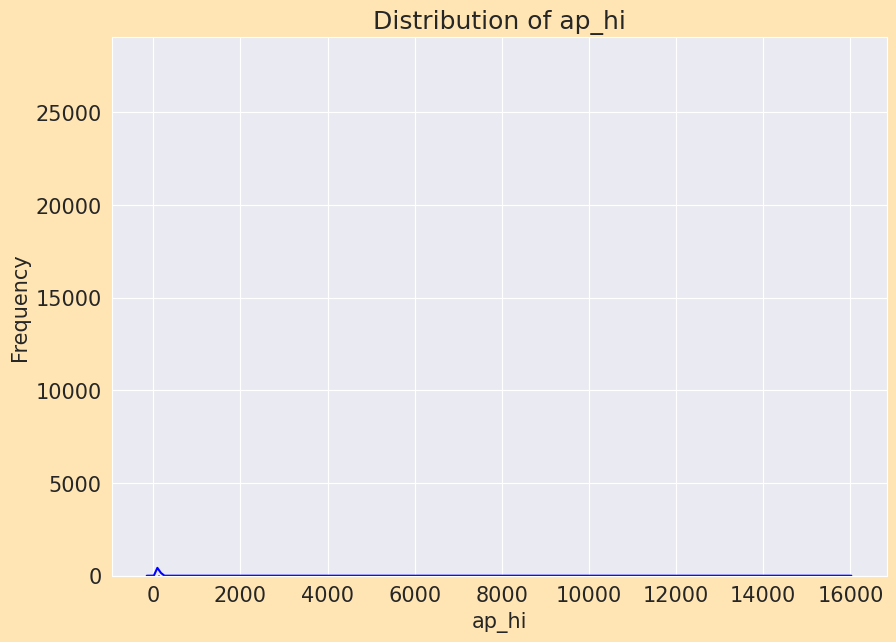

In [28]:
iqr=np.percentile(df['ap_hi'],75)-np.percentile(df['ap_hi'],25)
bin_width_fd =2*iqr/np.cbrt(len(df['ap_hi']))
bins_fd = max(1, int((np.max(df['ap_hi']) - np.min(df['ap_hi'])) / bin_width_fd))  # Ensure at least 1 bin
sns.histplot(df['ap_hi'],bins=bins_fd,kde=True,color='blue')
plt.title(f'Distribution of ap_hi')
plt.xlabel('ap_hi')
plt.ylabel("Frequency")
plt.show()

In [29]:
q1=np.percentile(df['ap_hi'],25)
q3=np.percentile(df['ap_hi'],75)
iqr=q3-q1
lower_bound = q1 - (1.5*iqr)
upper_bound =q3 + (1.5*iqr)
outliers=df[(df['ap_hi']<lower_bound) |(df['ap_hi']> upper_bound) ]
print(lower_bound,upper_bound)
outliers
 

90.0 170.0


id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
59        74  20431       1     164      64    180     90            1     1   
61        79  20960       2     165      75    180     90            3     1   
101      136  18718       1     167      80    190     90            2     1   
209      288  18169       2     172      62     80     70            1     1   
230      318  23376       2     175      75    180    100            3     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69587  99398  23223       1     169     101    180    110            1     1   
69593  99405  16781       2     179      93    180    100            1     2   
69830  99734  22552       2     163      67    180    100            2     1   
69894  99835  16857       1     160      70    200    100            1     2   
69997  99996  19066       2     183     105    180     90            3     1   

       smoke  alco  active  cardio  Age  
59         1     0       1       1   55  
61         0     0       1       1   57  
101        0     1       0       0   51  
209        0     0       1       0   49  
230        1     1       1       1   64  
...      ...   ...     ...     ...  ...  
69587      0     0       0       1   63  
69593      0     1       1       1   45  
69830      0     0       0       1   61  
69894      0     0       1       1   46  
69997      0     1       0       1   52  

[1435 rows x 14 columns]

In [30]:
backup2=df.copy()
df[(df['ap_hi']<20) ]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
567      815  21281       1     168      78     14     90            2     1   
927     1294  21867       2     175      70     14     90            3     1   
979     1360  18225       1     172      65     11     80            1     3   
1600    2260  19201       1     165      66     12     80            1     1   
1627    2301  22591       1     165      71     14     80            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
68630  98039  21217       1     160      59     12     80            1     1   
68742  98213  18755       1     158      74     14     90            1     1   
68998  98568  19107       1     154      77     14     90            1     1   
69137  98743  15442       2     176      65     12     80            1     1   
69549  99328  21243       1     155      69     13     90            1     3   

       smoke  alco  active  cardio  Age  
567        0     0       1       1   58  
927        0     0       1       1   59  
979        0     0       1       0   49  
1600       0     0       1       0   52  
1627       0     0       1       1   61  
...      ...   ...     ...     ...  ...  
68630      0     0       1       0   58  
68742      0     0       1       1   51  
68998      0     0       1       0   52  
69137      0     0       1       0   42  
69549      0     0       1       1   58  

[183 rows x 14 columns]

- it seems like there's zero is missing here so will multiply it by 10

In [31]:
df.loc[df['ap_hi'] <20 , 'ap_hi'] *= 10

In [32]:
df[(df['ap_hi']>20) & (df['ap_hi']<50) ]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
52851  75399  17770       2     164      64     24     20            3     1   

       smoke  alco  active  cardio  Age  
52851      0     0       1       1   48

In [33]:
df.loc[df['ap_hi'] ==24 , 'ap_hi'] *= 10

In [34]:
df[(df['ap_hi']>50) & (df['ap_hi']<80) ]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
636      913  20457       2     169      68     70    110            1     1   
4830    6843  16969       2     159      68     70    100            1     1   
5382    7657  21240       1     162      69     70     80            1     1   
7076   10083  21235       1     154      61     70     50            2     2   
11951  17067  15795       2     160      52     70     40            1     1   
13675  19520  21298       1     156      72     70    110            3     3   
13755  19634  15892       1     157      73     60     40            1     3   
14269  20375  23341       1     167      77     70    110            1     1   
16629  23761  14506       1     162      57     70     50            1     1   
20697  29541  22626       1     165      61     70    110            1     3   
23703  33882  17476       1     160      60     70    110            1     1   
32733  46733  21129       2     164      70     70    100            1     1   
33493  47851  15354       1     171      69     70    110            1     1   
36305  51845  15503       2     168      68     70    120            1     1   
38730  55291  16528       1     149      51     70    120            1     1   
40454  57807  20496       1     164      62     70   1100            1     1   
40634  58065  16913       2     171      76     70    120            1     1   
45951  65633  15399       1     158      47     70     40            1     1   
54447  77668  16373       1     156      59     70    110            1     1   
56927  81260  18336       1     155      76     70     15            1     1   

       smoke  alco  active  cardio  Age  
636        0     0       1       0   56  
4830       0     0       0       0   46  
5382       0     0       1       0   58  
7076       0     1       0       0   58  
11951      1     0       1       0   43  
13675      0     0       1       1   58  
13755      0     0       0       0   43  
14269      0     0       0       0   63  
16629      0     0       1       0   39  
20697      0     0       0       0   61  
23703      0     0       1       0   47  
32733      0     0       0       0   57  
33493      0     1       1       0   42  
36305      1     0       0       0   42  
38730      0     0       1       0   45  
40454      0     0       0       0   56  
40634      1     1       1       0   46  
45951      0     0       1       0   42  
54447      0     1       1       0   44  
56927      0     1       1       1   50

- it looks like there's one missing so we can add 100 to the values who's having a high ap_lo

In [35]:
df[(df['ap_hi']<90) & (df['ap_lo']>100) ]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
636      913  20457       2     169      68     70    110            1     1   
2990    4214  21957       2     182      90     80    140            3     3   
3447    4880  19992       2     180      80     80    125            3     3   
3623    5130  21874       1     160      83     80    120            1     1   
4941    6992  20501       1     160      69     80    170            1     1   
5760    8190  15860       1     150      66     80    120            1     1   
8422   12019  23152       2     162      60     80    130            1     1   
8757   12494  16905       2     163      63     10   2088            1     1   
8947   12756  17320       2     172     102     80    130            1     1   
9452   13470  16103       2     172      71     80    120            1     1   
11060  15821  16067       1     174      84     80    120            1     1   
13675  19520  21298       1     156      72     70    110            3     3   
14269  20375  23341       1     167      77     70    110            1     1   
17248  24645  21200       2     175      72     80    120            2     1   
17328  24758  22428       1     162      72     80    140            3     3   
17529  25046  20011       1     160      76     80    130            1     1   
18877  26957  21156       1     165      65     80    120            2     1   
20697  29541  22626       1     165      61     70    110            1     3   
20954  29919  20502       2     170      72     80    120            1     1   
23703  33882  17476       1     160      60     70    110            1     1   
24548  35049  21178       2     164      75     80    140            1     1   
24707  35279  21183       2     168      65     80    120            1     3   
25117  35864  16320       1     160      67     80    120            1     1   
29444  42091  23448       1     156      61     80    120            3     3   
29985  42877  21331       1     163     102     80    120            1     1   
31315  44701  22801       1     163     115     20    170            1     1   
33493  47851  15354       1     171      69     70    110            1     1   
36305  51845  15503       2     168      68     70    120            1     1   
38271  54625  21679       1     164      72     80    140            1     1   
38730  55291  16528       1     149      51     70    120            1     1   
40454  57807  20496       1     164      62     70   1100            1     1   
40634  58065  16913       2     171      76     70    120            1     1   
40899  58449  18138       1     164      72     80    120            1     3   
42009  60002  15912       1     156      81     80    110            2     2   
42274  60401  21266       1     157      96     80    110            1     1   
42334  60477  18716       1     171      80     10   1088            1     1   
43697  62439  17361       1     163      76     80    120            2     1   
44870  64076  17674       2     173      86     80    120            1     1   
45551  65072  14678       1     157      62     80    110            1     1   
46031  65750  14890       2     188      96     80    130            1     1   
47166  67365  16068       1     160      75     80    120            2     1   
48839  69732  20014       2     174      86     85    130            3     1   
49886  71214  18161       2     186      90     80    120            1     1   
50888  72608  19687       2     166      54     80    120            1     1   
54447  77668  16373       1     156      59     70    110            1     1   
54517  77774  17322       2     175      79     80    105            1     1   
55007  78468  21919       1     156      61     80    130            2     2   
55256  78823  21087       1     154      72     80    120            1     1   
56108  80053  18435       1     152      68     80    120            1     1   
59283  846

In [36]:
df=df[df['ap_hi']!=10]

In [37]:
df.loc[(df['ap_hi'] < 90) & (df['ap_lo'] > 100), 'ap_hi'] += 100

In [38]:
df.loc[df['ap_hi'] == 20, 'ap_hi'] += 100

In [39]:
df[df['ap_hi']<20]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
4607    6525  15281       1     165      78  -1000     80            2     1   
16021  22881  22108       2     161      90  -1150     70            1     1   
20536  29313  15581       1     153      54  -1000     70            1     1   
23988  34295  18301       1     162      74  -1400     90            1     1   
25240  36025  14711       2     168      50  -1200     80            2     1   
35040  50055  23325       2     168      59  -1500     80            1     1   
46627  66571  23646       2     160      59  -1200     80            1     1   

       smoke  alco  active  cardio  Age  
4607       0     0       1       0   41  
16021      0     0       1       0   60  
20536      0     0       1       0   42  
23988      0     0       1       1   50  
25240      0     0       0       1   40  
35040      0     0       1       1   63  
46627      0     0       0       0   64

In [40]:
df.drop(df[df['ap_hi'] <5].index, inplace=True)

In [41]:
df[df['ap_hi']>240]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
1876    2654  15116       1     160      60    902     60            1     1   
2014    2845  22712       2     167      59    906      0            1     1   
4817    6822  14425       1     168      63    909     60            2     1   
7763   11089  21032       1     175      80  11500     90            1     1   
8915   12710  18870       1     164      75   1420     80            2     1   
9557   13616  22659       1     155      87    701    110            1     1   
13895  19827  15996       1     168      72   1500     80            1     1   
17713  25314  22398       2     163      50    907     70            3     3   
23867  34120  16131       1     161      92    906      0            2     1   
25464  36339  15835       2     169      75  14020     80            2     1   
25519  36414  21361       1     169      71  14020     80            3     3   
25780  36793  18304       1     157      83   1400     80            1     1   
28147  40239  19700       2     175      87   1620     80            2     1   
29665  42410  17548       1     154      65    907     70            1     1   
31783  45400  16070       1     170      64    907      0            1     1   
36894  52725  20612       2     175      78   1130     90            1     1   
40330  57646  20322       1     162      50    309      0            1     1   
40831  58349  19806       1     162      67    401     80            1     3   
40852  58374  17438       1     169      70  16020     80            1     1   
41095  58728  21117       1     160      60   1202     80            1     1   
41505  59301  20970       1     154      41    806      0            1     1   
42397  60565  17988       2     176      69    906      0            1     1   
42658  60948  20456       2     182      80    906     60            1     1   
43133  61618  20961       2     170      78   1400     90            2     1   
43208  61725  23418       1     165      67   1420     80            2     1   
43504  62154  19534       1     158      62   1300     80            3     1   
46912  66998  16910       2     180      78  14020     90            1     1   
47253  67502  19731       1     160      65  14020     90            1     1   
48795  69672  21867       1     156      76   1400     90            1     1   
50836  72539  16918       2     164      66   1409     90            1     1   
51438  73356  18784       2     168      65  11020     80            1     1   
53982  77010  18511       1     164      54    960     60            1     1   
55459  79116  18307       1     152      76  13010     80            2     2   
55847  79679  23182       1     161     105  13010     80            1     1   
57291  81769  21948       2     166      73   1300     90            1     1   
57918  82660  23264       1     153      63   1110     80            1     1   
63996  91364  16929       1     168      69   1205     90            1     1   
64911  92655  16674       1     157      78    906     60            2     1   
68663  98095  18190       1     156      41    906      0            1     1   
69370  99089  14696       1     170      74   2000    100            2     1   

       smoke  alco  active  cardio  Age  
1876       0     0       1       0   41  
2014       0     0       1       0   62  
4817       0     0       1       0   39  
7763       0     0       1       1   57  
8915       0     0       1       1   51  
9557       0     0       1       1   62  
13895      0     0       1       1   43  
17713      0     0       1       1   61  
23867      0     0       1       1   44  
25464      0     0       1       1   43  
25519      0     0       1       1   58  
25780      0     0       1       1   50  
28147      0     0       1       1   53  
29665      0     0       1       0   48  
31783      0     0       1       0   44  
36894      0     0       1       1   56  
40330      0   

In [42]:
df.drop(df[df['ap_hi'] > 240].index, inplace=True)

In [43]:
df[df['ap_hi']>200]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
1328    1863  21063       2     174     106    220    120            3     3   
2142    3026  15384       2     174     113    210   1100            1     1   
2278    3208  22636       1     156     101    220    110            1     2   
4981    7054  22722       2     173      74    220    160            2     2   
8919   12717  19088       2     176      61    210    110            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
64778  92462  19548       2     172      84    210    120            1     1   
66108  94377  21179       2     173     112    220   1400            1     1   
67710  96686  19687       2     168      75    240    140            3     1   
68579  97963  19769       2     171      71    220    110            2     1   
69329  99019  19818       1     145      62    240    130            1     1   

       smoke  alco  active  cardio  Age  
1328       0     0       1       0   57  
2142       0     0       1       1   42  
2278       0     0       0       1   62  
4981       0     0       1       1   62  
8919       0     0       1       1   52  
...      ...   ...     ...     ...  ...  
64778      0     0       1       1   53  
66108      0     0       1       1   58  
67710      0     0       1       1   53  
68579      0     0       1       1   54  
69329      0     0       0       1   54  

[61 rows x 14 columns]

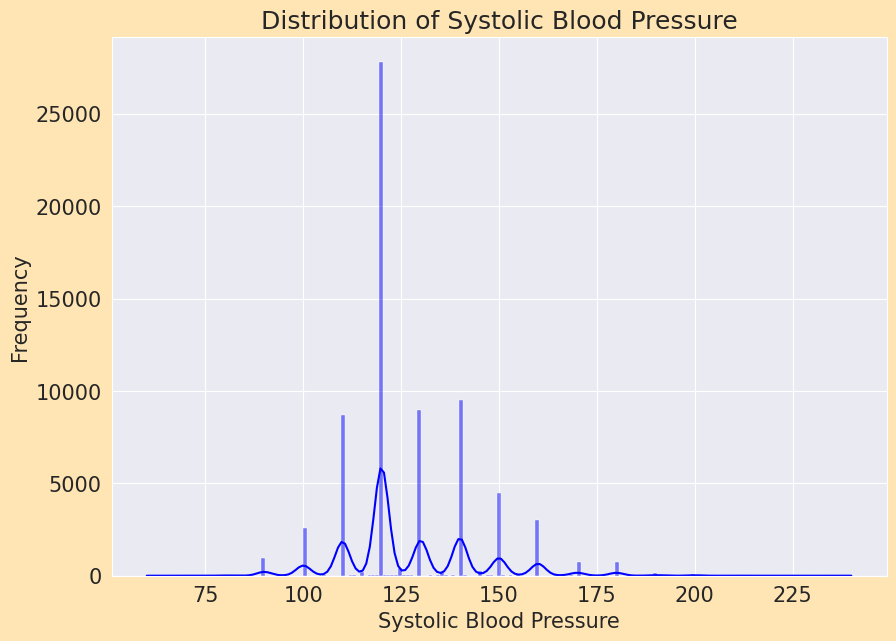

In [44]:
iqr=np.percentile(df['ap_hi'],75)-np.percentile(df['ap_hi'],25)
bin_width_fd =2*iqr/np.cbrt(len(df['ap_hi']))
bins_fd = max(1, int((np.max(df['ap_hi']) - np.min(df['ap_hi'])) / bin_width_fd))  # Ensure at least 1 bin
sns.histplot(df['ap_hi'],bins=bins_fd,kde=True,color='blue')
plt.title(f'Distribution of Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel("Frequency")
plt.show()

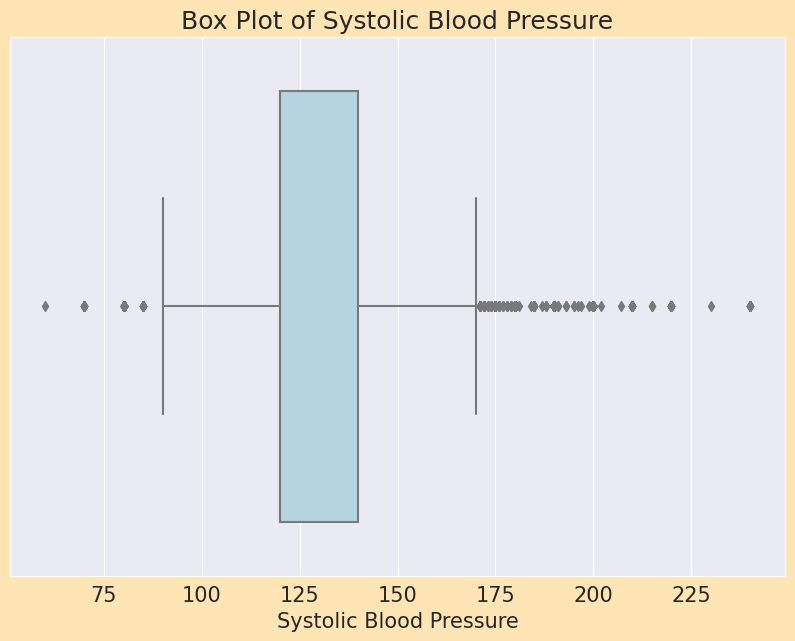

In [45]:
sns.boxplot(x=df['ap_hi'], color="lightblue")
plt.title(f'Box Plot of Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.show()

### Diastolic Blood Pressure (ap_lo) 

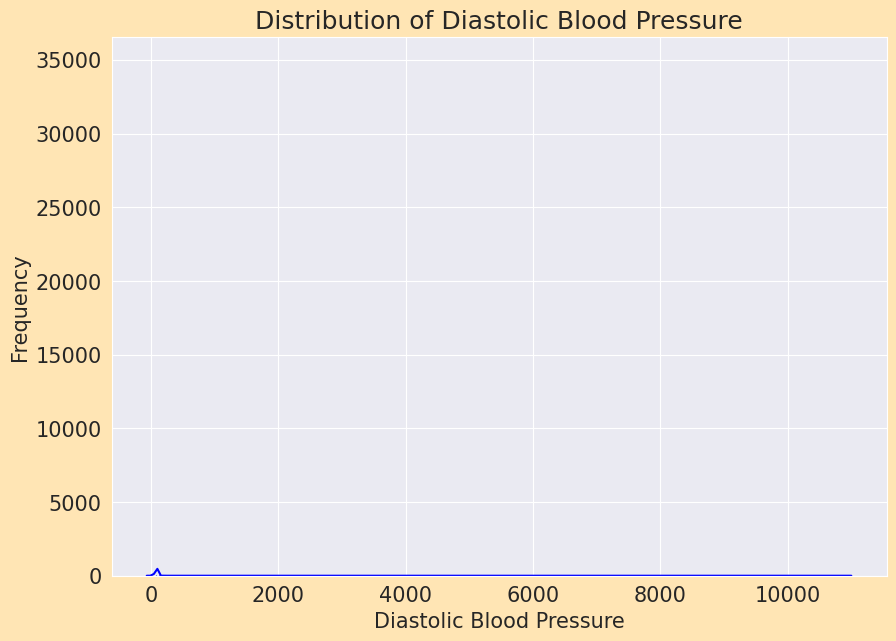

In [46]:
iqr=np.percentile(df['ap_lo'],75)-np.percentile(df['ap_lo'],25)
bin_width_fd =2*iqr/np.cbrt(len(df['ap_lo']))
bins_fd = max(1, int((np.max(df['ap_lo']) - np.min(df['ap_lo'])) / bin_width_fd))  # Ensure at least 1 bin
sns.histplot(df['ap_lo'],bins=bins_fd,kde=True,color='blue')
plt.title(f'Distribution of Diastolic Blood Pressure')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel("Frequency")
plt.show()

In [47]:
q1=np.percentile(df['ap_lo'],25)
q3=np.percentile(df['ap_hi'],75)
iqr=q3-q1
lower_bound = q1 - (1.5*iqr)
upper_bound =q3 + (1.5*iqr)
outliers=df[(df['ap_lo']<lower_bound) |(df['ap_lo']> upper_bound) ]
print(lower_bound,upper_bound)
outliers
 

-10.0 230.0


id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
228      314  17489       2     183      98    160   1100            1     2   
241      334  21932       2     157      60    160   1000            2     1   
260      357  18217       1     150      83    140    800            1     1   
329      458  23407       1     176      63    160   1000            2     2   
345      482  18704       1     154      81    140   1000            2     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69771  99659  23330       1     167      81    160   1000            1     1   
69872  99798  21808       1     152      56    160   1000            1     1   
69878  99807  21239       2     168      95    160   1000            1     1   
69885  99816  22417       2     166      78    170   1000            1     1   
69967  99955  21416       2     168      63    140   1000            1     1   

       smoke  alco  active  cardio  Age  
228        1     0       1       1   47  
241        0     0       0       1   60  
260        0     0       1       1   49  
329        0     0       0       1   64  
345        0     0       1       1   51  
...      ...   ...     ...     ...  ...  
69771      0     0       1       1   63  
69872      0     0       1       1   59  
69878      0     0       1       1   58  
69885      0     0       0       0   61  
69967      0     0       1       1   58  

[952 rows x 14 columns]

In [48]:
df[df['ap_lo']<=5]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
13489  19258  14965       2     150      60    130      0            1     1   
16459  23512  20457       1     156      50    138      0            3     1   
17381  24837  18226       1     164      78    138      0            1     1   
22923  32749  21182       2     166      68    149      0            1     1   
25454  36325  17952       2     176      73    120      0            1     1   
27686  39577  23396       2     180      73    140      0            1     1   
35140  50210  20877       1     146      55    130      1            1     1   
38370  54780  23208       2     170      81    148      0            1     1   
43922  62754  18802       1     164      78    108      0            2     1   
45835  65470  19597       2     165      70    140      0            3     1   
48049  68612  19012       1     160      84    121      0            1     1   
52580  75007  21919       1     155      66    130      0            1     1   
56950  81298  15268       1     164      70    120      0            1     1   
60106  85816  22571       1     167      74    150    -70            1     1   
63787  91073  14722       2     161      61    117      0            1     1   
65303  93224  23612       2     176      99    120      0            1     3   

       smoke  alco  active  cardio  Age  
13489      0     0       0       0   41  
16459      0     0       1       1   56  
17381      0     0       1       0   49  
22923      0     0       1       1   58  
25454      0     0       1       0   49  
27686      1     1       1       1   64  
35140      0     0       0       0   57  
38370      0     0       1       0   63  
43922      0     0       1       0   51  
45835      1     0       1       0   53  
48049      0     0       0       1   52  
52580      0     0       1       0   60  
56950      0     0       1       0   41  
60106      0     0       1       1   61  
63787      0     0       1       0   40  
65303      0     0       1       1   64

In [49]:
df.drop(df[df['ap_lo'] <5].index, inplace=True)
df[df['ap_lo']<10]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
7598   10843  14661       2     170      72    120      8            1     1   
9777   13943  21802       1     166     125    120      8            3     1   
18898  26983  17531       1     171      68    110      7            1     1   
19075  27242  19771       2     168      68    110      7            1     1   
28065  40122  20376       1     161      52     90      6            1     1   
38599  55119  18091       2     165      64    120      9            1     1   
68568  97950  15386       1     163      71    110      6            1     1   

       smoke  alco  active  cardio  Age  
7598       0     0       1       0   40  
9777       0     0       1       1   59  
18898      0     0       1       0   48  
19075      0     0       1       0   54  
28065      0     0       1       0   55  
38599      0     0       1       0   49  
68568      0     0       1       0   42

- it seems like it has a missing zero here

In [50]:
df.loc[df['ap_lo']<10 , 'ap_lo'] *= 10
df[df['ap_lo']<30]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
6737    9610  16705       1     156      61    150     10            1     1   
8797   12550  21155       1     162      68    110     20            1     1   
10106  14410  18334       1     152      50    150     10            3     1   
11820  16884  18171       1     169      69    128     20            1     1   
13935  19885  18007       1     164      74    110     20            1     1   
18958  27069  17452       2     170      62    110     20            1     1   
20135  28742  21436       1     160      72    110     20            2     2   
22380  31965  16120       2     170      66    120     20            1     1   
23305  33295  16641       2     172      66    120     20            1     1   
24757  35356  20432       1     168      68    120     20            1     1   
26513  37874  18984       1     157      69    160     10            3     1   
37169  53102  14454       1     165      60    170     10            1     1   
39896  57023  18167       1     177      59    120     20            2     2   
40650  58088  14671       1     162      58    120     20            1     1   
40961  58537  19174       1     170      68    100     20            1     1   
43307  61874  22718       1     151      58    170     10            3     1   
44609  63710  22433       2     165      65    130     20            1     1   
47711  68121  21742       1     156     100    140     10            1     1   
52851  75399  17770       2     164      64    240     20            3     1   
56927  81260  18336       1     155      76     70     15            1     1   
57641  82269  20627       1     157      76    180     20            1     1   
63828  91129  16842       1     178      69    110     10            1     1   
68223  97439  18809       2     173     100    130     20            1     1   

       smoke  alco  active  cardio  Age  
6737       0     0       0       1   45  
8797       0     0       1       0   57  
10106      0     0       1       1   50  
11820      0     0       1       1   49  
13935      0     0       1       0   49  
18958      0     0       1       1   47  
20135      0     0       0       0   58  
22380      0     0       1       1   44  
23305      0     0       0       0   45  
24757      0     0       1       1   55  
26513      0     0       1       1   52  
37169      0     0       1       0   39  
39896      0     0       1       1   49  
40650      0     0       1       0   40  
40961      0     0       1       0   52  
43307      0     0       1       1   62  
44609      0     0       1       1   61  
47711      0     0       1       0   59  
52851      0     0       1       1   48  
56927      0     1       1       1   50  
57641      0     0       1       1   56  
63828      0     0       1       0   46  
68223      0     0       1       1   51

- it seems like theer's a missing one they can be added by hundred but in all cases
- by adding it will cause a data errors so i will drop them 

In [51]:
df.drop(df[df['ap_lo'] <30].index, inplace=True)
#check for upper outliers
df[df['ap_lo']>230]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
228      314  17489       2     183      98    160   1100            1     2   
241      334  21932       2     157      60    160   1000            2     1   
260      357  18217       1     150      83    140    800            1     1   
329      458  23407       1     176      63    160   1000            2     2   
345      482  18704       1     154      81    140   1000            2     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69771  99659  23330       1     167      81    160   1000            1     1   
69872  99798  21808       1     152      56    160   1000            1     1   
69878  99807  21239       2     168      95    160   1000            1     1   
69885  99816  22417       2     166      78    170   1000            1     1   
69967  99955  21416       2     168      63    140   1000            1     1   

       smoke  alco  active  cardio  Age  
228        1     0       1       1   47  
241        0     0       0       1   60  
260        0     0       1       1   49  
329        0     0       0       1   64  
345        0     0       1       1   51  
...      ...   ...     ...     ...  ...  
69771      0     0       1       1   63  
69872      0     0       1       1   59  
69878      0     0       1       1   58  
69885      0     0       0       0   61  
69967      0     0       1       1   58  

[951 rows x 14 columns]

In [52]:
df[df['ap_lo']>1000]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
228      314  17489       2     183      98    160   1100            1     2   
473      680  15226       1     150      95    150   1033            1     1   
649      928  18190       1     166      57    190   1100            1     1   
881     1229  17405       2     170      84    150   1100            1     1   
1033    1438  15906       1     167      71    150   1001            2     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
67474  96344  19657       1     161      93    160   1200            3     1   
68037  97173  15164       2     161      93    170   1100            1     1   
68288  97529  23486       2     161      84    180   1100            1     1   
68538  97907  19062       1     166      70    160  10000            2     1   
69552  99334  22488       2     170      68    130   1100            1     1   

       smoke  alco  active  cardio  Age  
228        1     0       1       1   47  
473        0     0       1       1   41  
649        0     0       1       1   49  
881        1     0       0       1   47  
1033       0     0       1       1   43  
...      ...   ...     ...     ...  ...  
67474      0     0       0       1   53  
68037      0     0       1       1   41  
68288      0     0       1       1   64  
68538      0     0       1       1   52  
69552      0     0       1       0   61  

[253 rows x 14 columns]

- maybe there's an additional number at the end but in this case i will drop them "they are 253 i can't check for the validation of condition in all of them"

In [53]:
df.drop(df[df['ap_lo'] >=1000].index, inplace=True)
#check for upper outliers
df[df['ap_lo']>300]

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
260      357  18217       1     150      83    140    800            1     1   
7465   10644  22679       1     154      84    140    902            1     1   
8855   12626  14307       1     165      65    120    802            1     1   
10321  14728  20225       1     165      65    120    850            1     1   
10857  15529  19558       1     164      85    160    708            1     1   
15083  21573  18430       1     155      56    140    709            1     1   
15565  22240  14545       2     176      67    130    708            1     2   
16466  23523  20603       1     165      62    120    800            1     1   
17373  24824  18979       1     157      69    112    800            1     1   
19916  28435  22645       1     160      60    120    850            1     1   
21249  30356  16212       1     173      78    110    710            1     1   
22248  31790  18027       1     156      55    120    800            1     1   
22764  32517  19809       1     162      63    150    800            1     1   
25829  36862  21807       2     180      60    110    710            1     1   
31402  44828  21043       2     164      68    130    809            3     3   
31733  45318  18858       1     166      72    120    801            1     1   
38262  54612  21658       1     156      70    150    809            2     2   
38291  54656  21056       2     172     100    130    810            2     2   
40796  58298  18366       1     168      79    120    801            1     1   
44906  64128  22459       1     148      74    180    902            2     2   
46332  66175  14595       2     176      70    120    820            1     1   
50238  71695  19635       2     171      89    140    900            1     1   
54173  77262  19647       1     164     102    120    809            1     1   
56549  80714  23473       2     168      74    130    700            1     1   
57220  81683  19097       1     161      70    140    910            3     1   
62153  88752  21174       1     160      67    140    900            2     1   
63880  91198  18182       2     186      95    100    901            2     2   
64312  91794  19390       1     150      72    125    880            3     1   
64348  91842  21133       1     168      72    120    870            3     3   
64409  91933  21157       2     173      94    130    585            2     1   
68050  97190  18005       1     167      69    150    709            2     1   
69320  99006  21059       2     168      63    120    602            1     1   

       smoke  alco  active  cardio  Age  
260        0     0       1       1   49  
7465       0     0       1       0   62  
8855       0     0       0       1   39  
10321      0     0       0       1   55  
10857      0     0       1       0   53  
15083      0     0       1       1   50  
15565      1     1       1       0   39  
16466      0     0       1       1   56  
17373      0     0       1       1   51  
19916      0     0       1       1   62  
21249      0     0       1       0   44  
22248      0     0       1       0   49  
22764      0     0       1       1   54  
25829      1     0       1       0   59  
31402      0     0       1       0   57  
31733      0     0       1       0   51  
38262      0     0       1       0   59  
38291      1     1       1       1   57  
40796      0     0       1       0   50  
44906      0     0       1       1   61  
46332      0     0       0       0   39  
50238      0     0       0       1   53  
54173      0     0       0       0   53  
56549      1     1       1       0   64  
57220      0     0       1       1   52  
62153      0     0       1       1   58  
63880      0     0       1       0   49  
64312      0     0       1       1   53  
64348      0     0       1       1   57  
64409      0     0       1       1   57  
68050      0     0       0       0   49  
69320      0     0       

- may be there's an additional number at the end also

In [54]:
df.drop(df[df['ap_lo'] >300].index, inplace=True)
#check for upper outliers
df[df['ap_lo']>250]

Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, Age]
Index: []

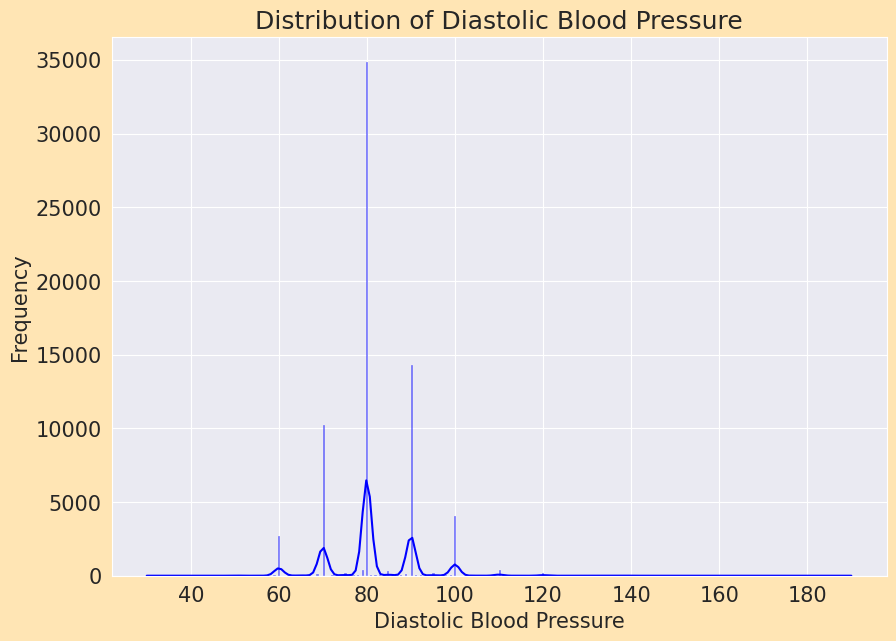

In [55]:
iqr=np.percentile(df['ap_lo'],75)-np.percentile(df['ap_lo'],25)
bin_width_fd =2*iqr/np.cbrt(len(df['ap_lo']))
bins_fd = max(1, int((np.max(df['ap_lo']) - np.min(df['ap_lo'])) / bin_width_fd))  # Ensure at least 1 bin
sns.histplot(df['ap_lo'],bins=bins_fd,kde=True,color='blue')
plt.title(f'Distribution of Diastolic Blood Pressure')
plt.xlabel('Diastolic Blood Pressure')
plt.ylabel("Frequency")
plt.show()

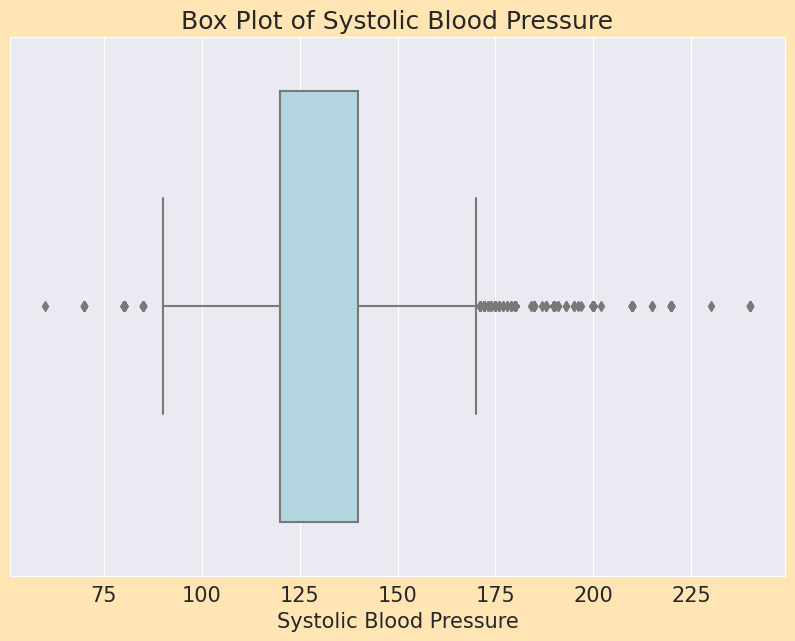

In [56]:
sns.boxplot(x=df['ap_hi'], color="lightblue")
plt.title(f'Box Plot of Systolic Blood Pressure')
plt.xlabel('Systolic Blood Pressure')
plt.show()

categorical data encoded by default

In [57]:
df.sample()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
68854  98372  18842       2     165      71    120     80            1     1   

       smoke  alco  active  cardio  Age  
68854      0     0       0       0   51

## ***Categrecal Analysis***

### gender

In [58]:
gender_counts = df['gender'].value_counts() 
gender_counts

gender
1    44914
2    24047
Name: count, dtype: int64

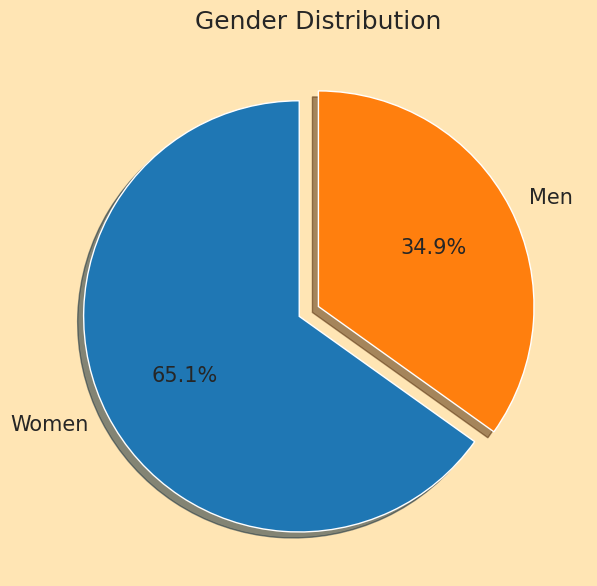

In [59]:
# 1 for women 2 for men
gender_counts = df['gender'].value_counts() 
plt.pie(
    gender_counts, 
    labels=['Women','Men'], 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=90, 
    explode=[0.1, 0]  # Slice the smaller part
)

plt.title("Gender Distribution")
plt.show()


### cholesterol

In [60]:
# cholesterol | 1: normal, 2: above normal, 3: well above normal |
df['cholesterol'].value_counts()

cholesterol
1    51729
2     9337
3     7895
Name: count, dtype: int64

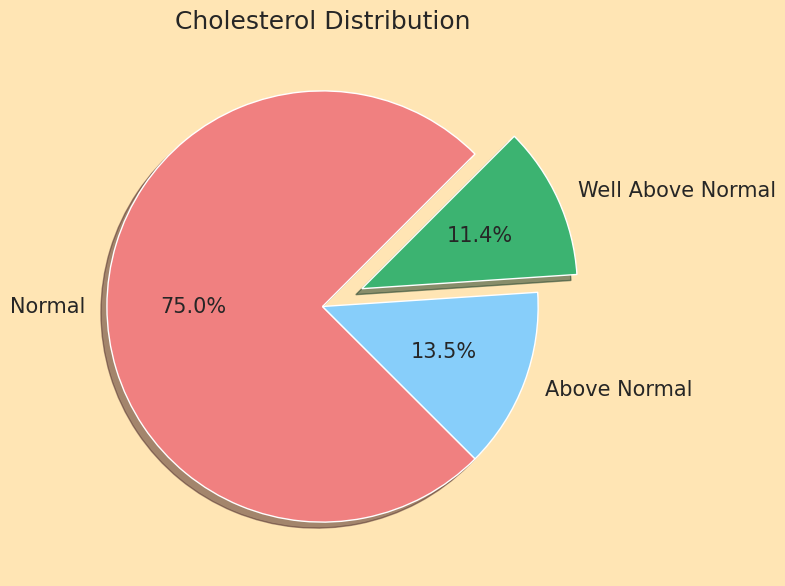

In [61]:
cholesterol_counts = df['cholesterol'].value_counts()

# Find the index of the smallest value
smallest_index = cholesterol_counts.argmin()  

# Create an explode list (0 for all, except the smallest one)
explode = [0] * len(cholesterol_counts)
explode[smallest_index] = 0.2

colors = ['lightcoral', 'lightskyblue', 'mediumseagreen']  

plt.pie(
    cholesterol_counts, 
    labels=['Normal', 'Above Normal', 'Well Above Normal'], 
    autopct='%1.1f%%', 
    colors=colors, 
    shadow=True, 
    startangle=45, 
    explode=explode  
)

plt.title("Cholesterol Distribution")
plt.show()


### Glucose 

In [62]:
# Glucose  | 1: normal, 2: above normal, 3: well above normal | 
df['gluc'].value_counts()

gluc
1    58628
3     5247
2     5086
Name: count, dtype: int64

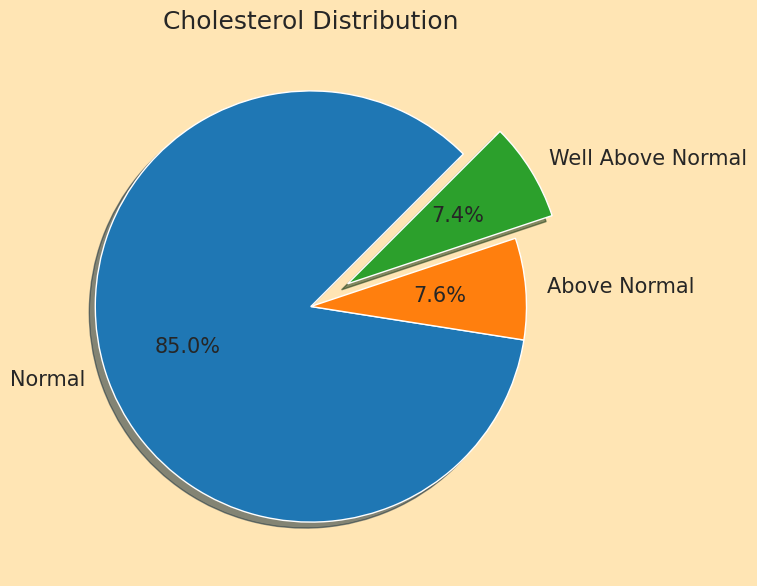

In [63]:
Glucose_counts = df['gluc'].value_counts()

# Find the index of the smallest value
smallest_index = Glucose_counts.argmin()  

# Create an explode list (0 for all, except the smallest one)
explode = [0] * len(Glucose_counts)
explode[smallest_index] = 0.2


plt.pie(
    Glucose_counts, 
    labels=['Normal', 'Above Normal', 'Well Above Normal'], 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=45, 
    explode=explode  
)

plt.title("Cholesterol Distribution")
plt.show()


### Smoking 

In [64]:
# 1 for smoker 0 for not
df.smoke.value_counts()

smoke
0    62900
1     6061
Name: count, dtype: int64

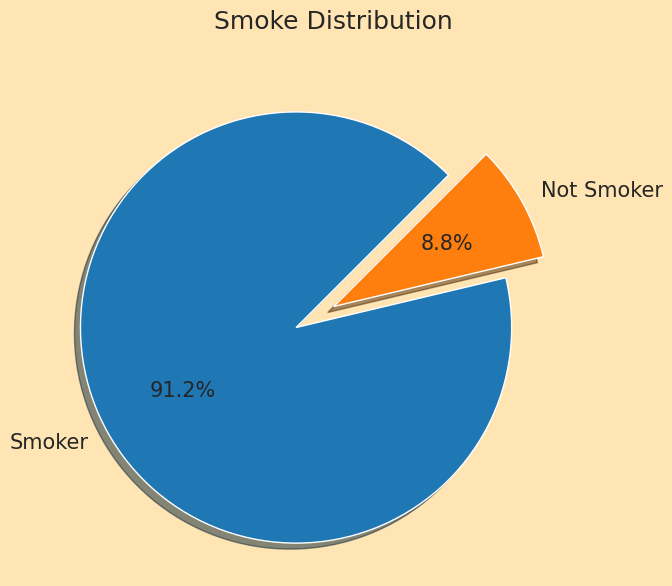

In [65]:
Smoking_counts = df['smoke'].value_counts() 
plt.pie(
    Smoking_counts, 
    labels=['Smoker','Not Smoker'], 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=45, 
    explode=[0.2, 0]  # Slice the smaller part
)

plt.title("Smoke Distribution")
plt.show()


### Alcohol intake

In [66]:
# 1 for drinker 0 for not
df.alco.value_counts()

alco
0    65265
1     3696
Name: count, dtype: int64

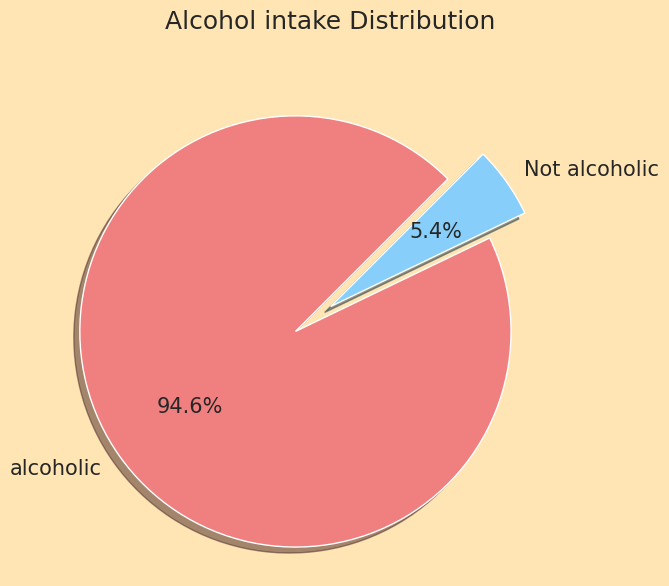

In [67]:
alco_counts = df['alco'].value_counts() 
plt.pie(
    alco_counts, 
    labels=['alcoholic','Not alcoholic'], 
    autopct='%1.1f%%', 
    colors=['lightcoral', 'lightskyblue'], 
    shadow=True, 
    startangle=45, 
    explode=[0.2, 0]  # Slice the smaller part
)

plt.title("Alcohol intake Distribution")
plt.show()


### Physical activity 

In [68]:
# 1 for active 0 for not
df.active.value_counts()

active
1    55394
0    13567
Name: count, dtype: int64

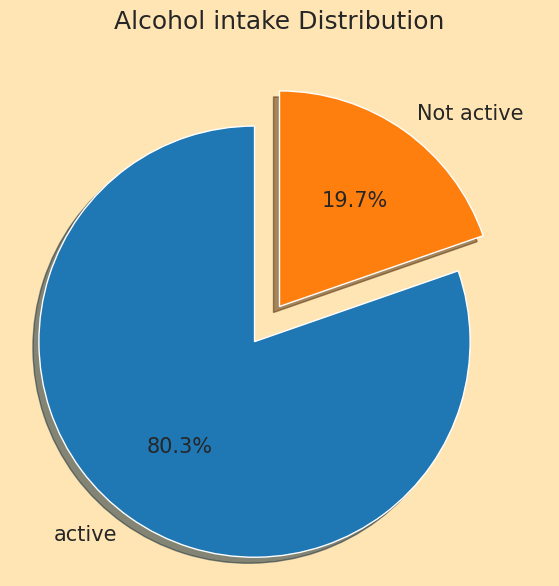

In [69]:
active_counts = df['active'].value_counts() 
plt.pie(
    active_counts, 
    labels=['active','Not active'], 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=90, 
    explode=[0.2, 0]  # Slice the smaller part
)

plt.title("Alcohol intake Distribution")
plt.show()


### Have the disease

In [70]:
# 1 for active 0 for not
df.cardio.value_counts()

cardio
0    34834
1    34127
Name: count, dtype: int64

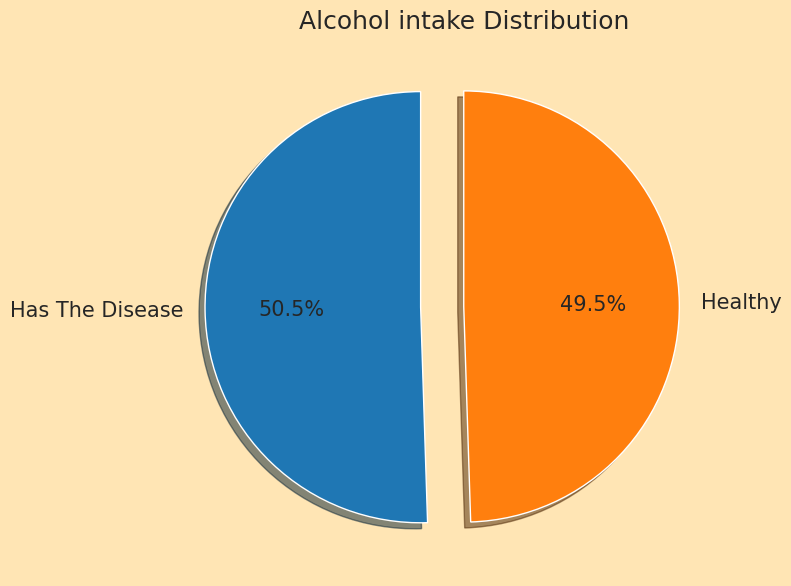

In [71]:
disease_counts = df['cardio'].value_counts() 
plt.pie(
    disease_counts, 
    labels=['Has The Disease','Healthy'], 
    autopct='%1.1f%%', 
    shadow=True, 
    startangle=90, 
    explode=[0.2, 0]  # Slice the smaller part
)

plt.title("Alcohol intake Distribution")
plt.show()


# ***Bivariate Analysis***

In [72]:
df.sample()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
9831  14026  20495       1     165      71    120     80            1     1   

      smoke  alco  active  cardio  Age  
9831      0     0       1       1   56

- 

##  📌 Finding data insights

### - 1. Which demographic groups (age, gender) are more prone to heart disease in this dataset?

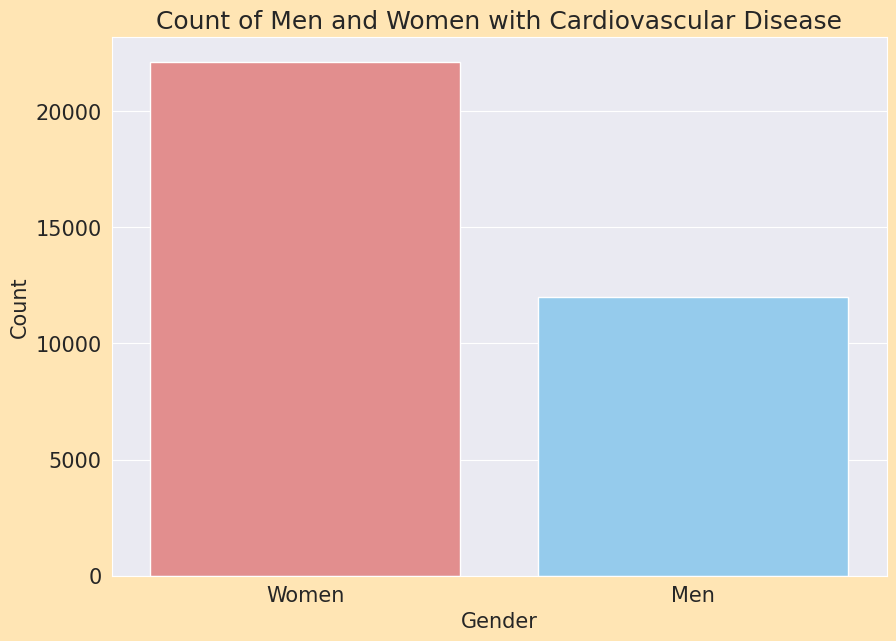

In [73]:
gender_disease_counts = df[df["cardio"] == 1]["gender"].value_counts()
labels = ["Women", "Men"]
sns.barplot(x=labels, y=gender_disease_counts.values, palette=["lightcoral", "lightskyblue"])
plt.title("Count of Men and Women with Cardiovascular Disease")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

- women affected more tha men will try to find the reason

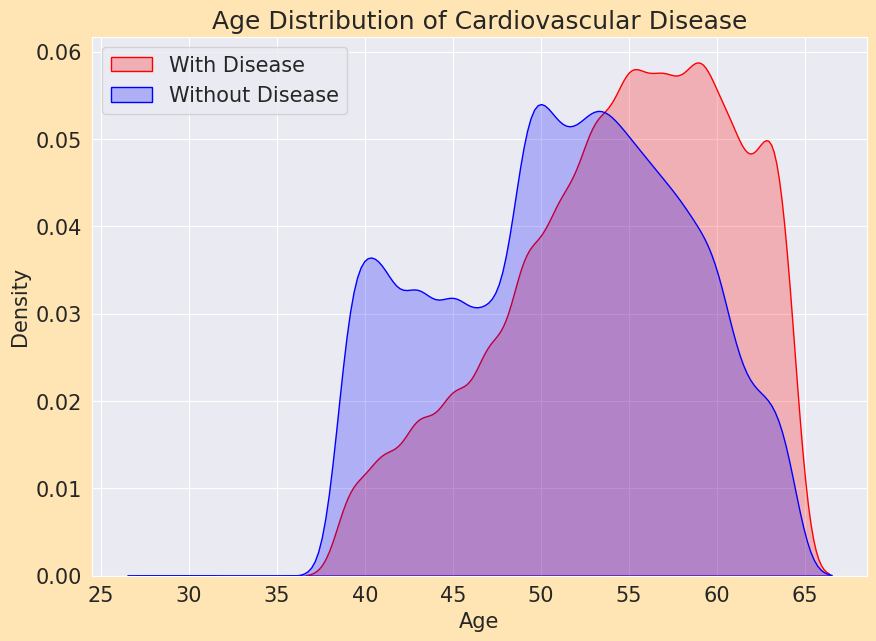

In [74]:
sns.kdeplot(df[df["cardio"] == 1]["Age"], fill=True, color="red", label="With Disease")
sns.kdeplot(df[df["cardio"] == 0]["Age"], fill=True, color="blue", label="Without Disease")
plt.title("Age Distribution of Cardiovascular Disease")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(loc='upper left')  
plt.show()

- you can say that the 50 to 65 range is demonstrated

### - 2. At what age range does the incidence of heart disease begin to rise significantly?

age_group
55-59    17903
50-54    17084
60-64    12832
45-49    10987
40-44     8388
35-39     1763
30-34        1
65-69        0
Name: count, dtype: int64
age_group
30-34     0.000000
35-39    23.879750
40-44    30.376729
45-49    42.814235
50-54    45.943573
55-59    56.091158
60-64    66.731608
65-69          NaN
Name: cardio, dtype: float64


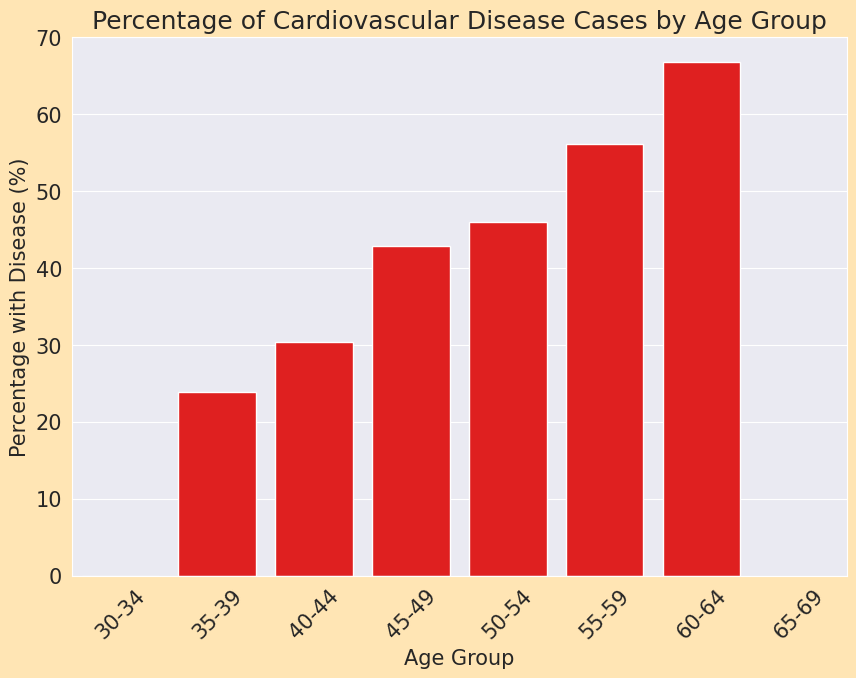

In [75]:
bins = list(range(30, 75, 5))  
labels = [f"{b}-{b+4}" for b in bins[:-1]]
df["age_group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
print(df["age_group"].value_counts())  
age_group_counts = df.groupby("age_group")["cardio"].mean() * 100  
print(age_group_counts)
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, color="red")
plt.title("Percentage of Cardiovascular Disease Cases by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Percentage with Disease (%)")
plt.xticks(rotation=45)
plt.show()


### 3. How do cholesterol levels correlate with the risk of heart disease?

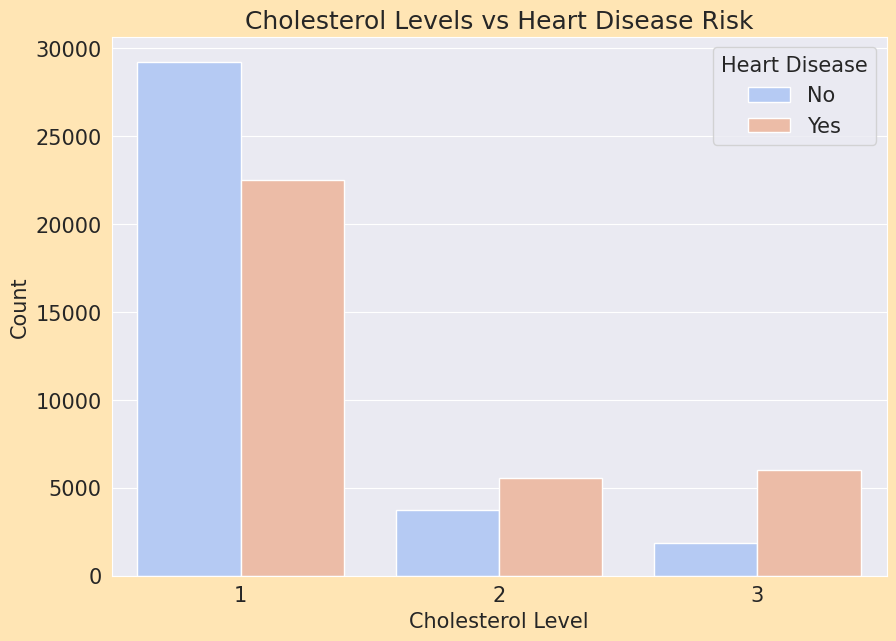

In [76]:
sns.countplot(data=df, x="cholesterol", hue="cardio", palette="coolwarm")

plt.xlabel("Cholesterol Level")
plt.ylabel("Count")
plt.title("Cholesterol Levels vs Heart Disease Risk")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

- there's a strong relationship like in type 3

### 4. Is there a noticeable difference in heart disease rates between smokers and non smokers?


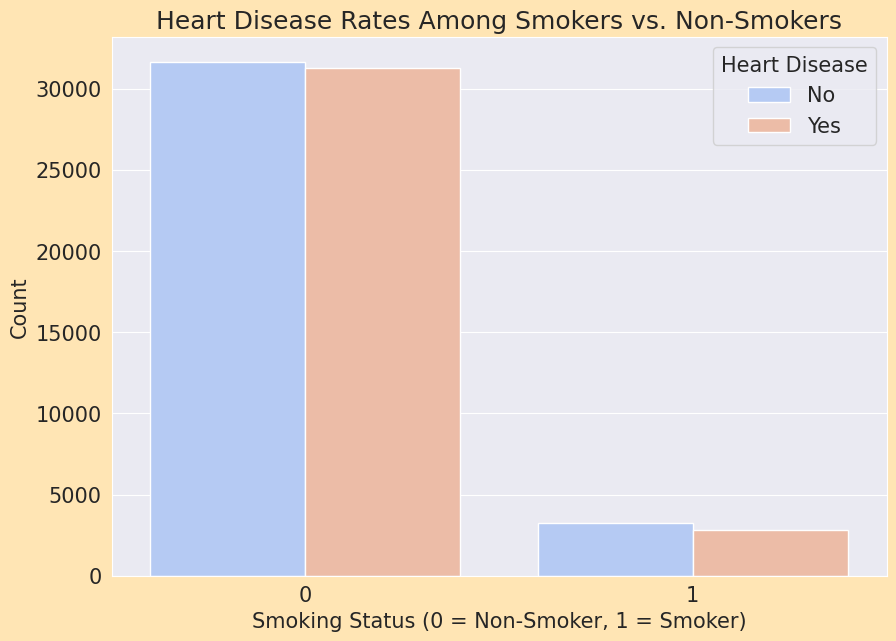

In [77]:
sns.countplot(data=df, x="smoke", hue="cardio", palette="coolwarm")

plt.xlabel("Smoking Status (0 = Non-Smoker, 1 = Smoker)")
plt.ylabel("Count")
plt.title("Heart Disease Rates Among Smokers vs. Non-Smokers")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()


- you can see that relation isn't strong

### 5. Does regular physical activity appear to offer protection against CVD, and to what extent?

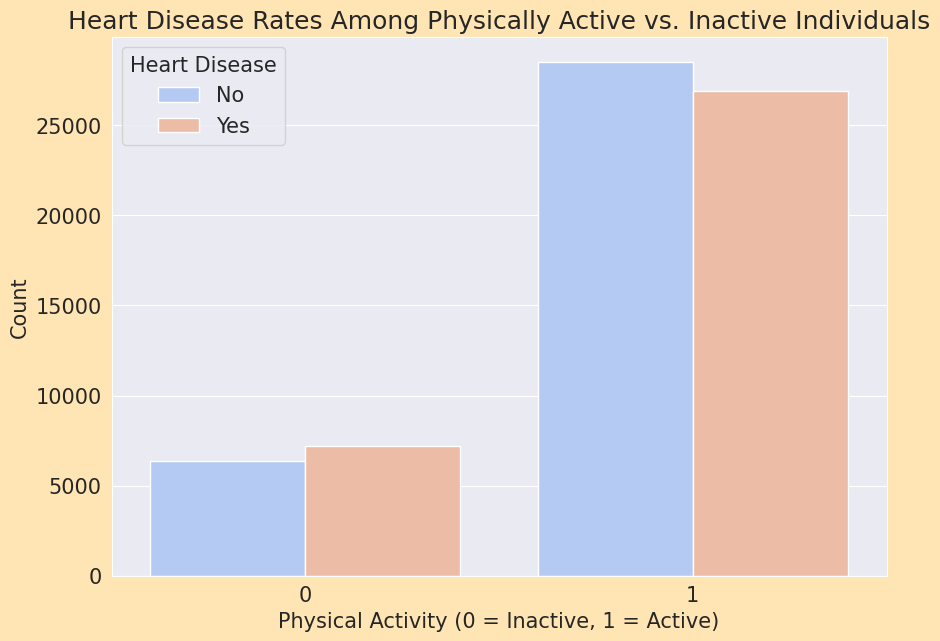

In [78]:
sns.countplot(data=df, x="active", hue="cardio", palette="coolwarm")

plt.xlabel("Physical Activity (0 = Inactive, 1 = Active)")
plt.ylabel("Count")
plt.title("Heart Disease Rates Among Physically Active vs. Inactive Individuals")
plt.legend(title="Heart Disease", labels=["No", "Yes"])
plt.show()

- the relationship looks like it's not that hard i think there's a problem in this dataset let's see the scatter plot for it

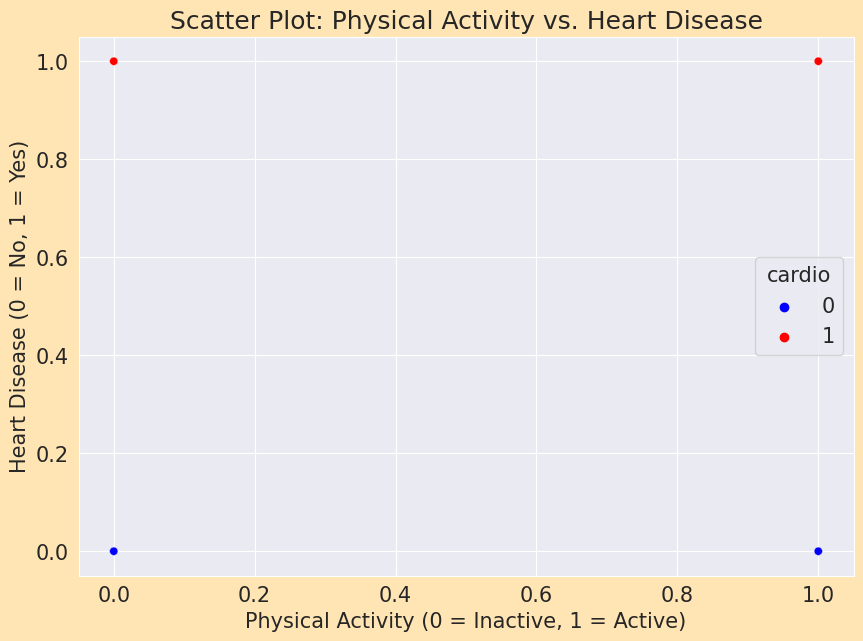

In [79]:
### contionus data
sns.scatterplot(
    data=df,  
    x="active", 
    y="cardio", 
    hue="cardio", 
    alpha=0.5, 
    palette={0: "blue", 1: "red"}
)

plt.xlabel("Physical Activity (0 = Inactive, 1 = Active)")
plt.ylabel("Heart Disease (0 = No, 1 = Yes)")
plt.title("Scatter Plot: Physical Activity vs. Heart Disease")
plt.show()

### - 6. How strongly does elevated blood pressure (systolic or diastolic) link to heart disease compared to other factors?

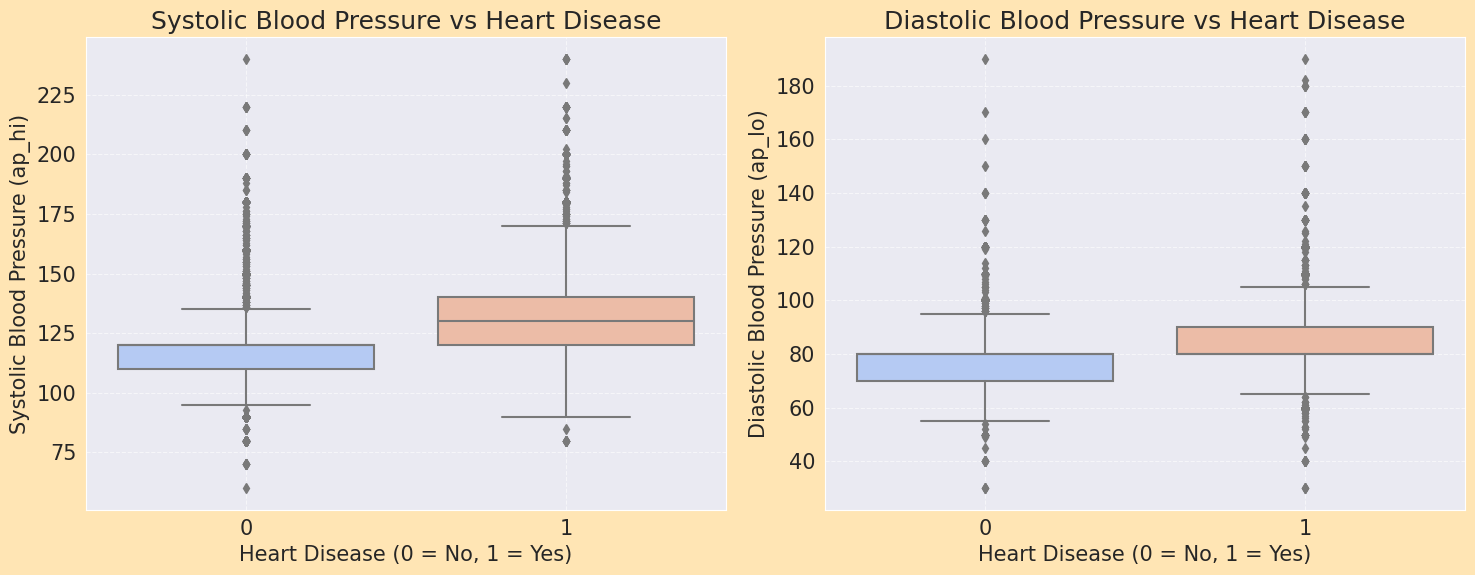

In [80]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="cardio", y="ap_hi", palette="coolwarm")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Systolic Blood Pressure (ap_hi)")
plt.title("Systolic Blood Pressure vs Heart Disease")
plt.grid(True, linestyle="--", alpha=0.6)  
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x="cardio", y="ap_lo", palette="coolwarm")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Diastolic Blood Pressure (ap_lo)")
plt.title("Diastolic Blood Pressure vs Heart Disease")
plt.grid(True, linestyle="--", alpha=0.6)  
plt.tight_layout()
plt.show()

- it looks like there's a relation healthy people in normal range and vice versa

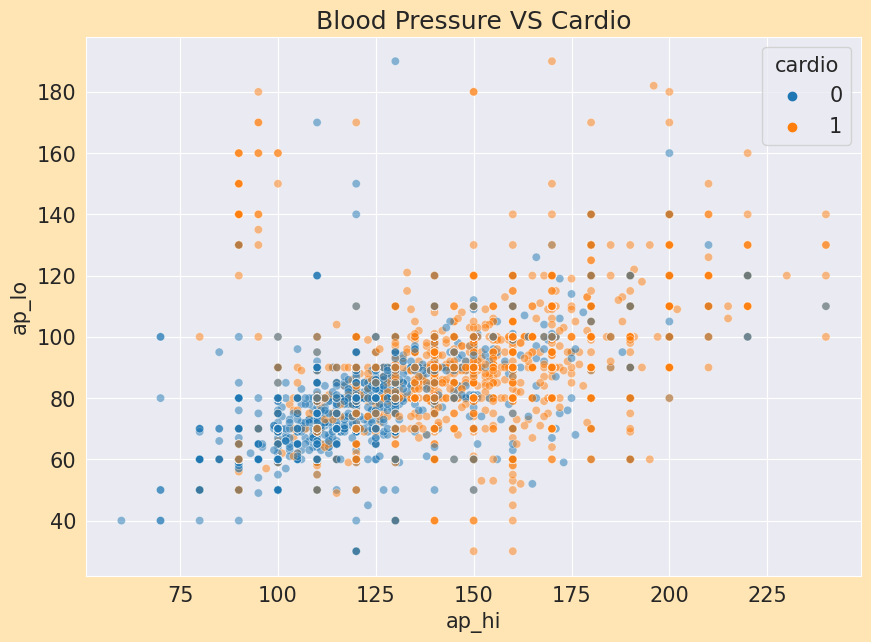

In [81]:
sns.scatterplot(x=df['ap_hi'], y=df['ap_lo'], hue=df['cardio'], alpha=0.5)
plt.title("Blood Pressure VS Cardio")
plt.show()


### - 7. Do men or women have higher disease rates, and does that gap change with age or other risk factors?

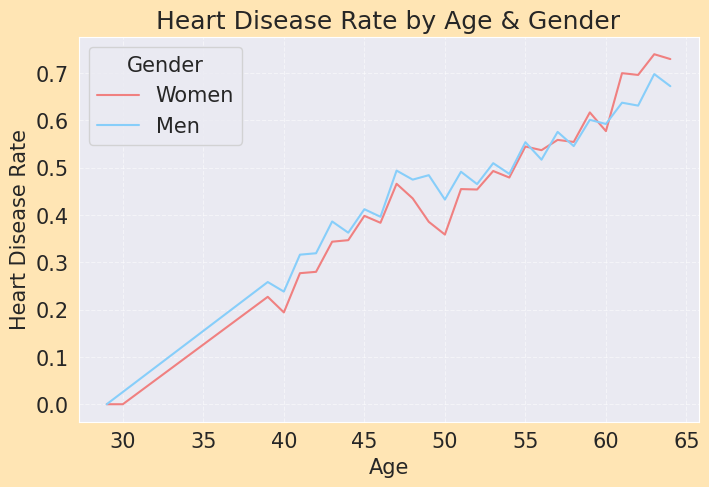

In [82]:
plt.figure(figsize=(8, 5))

sns.lineplot(
    data=df, x="Age", y="cardio", hue="gender", estimator="mean", ci=None, 
    palette=["lightcoral", "lightskyblue"]
)

plt.xlabel("Age")
plt.ylabel("Heart Disease Rate")
plt.title("Heart Disease Rate by Age & Gender")
plt.legend(title="Gender", labels=["Women", "Men"])
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


- Men has slightly bigger chance

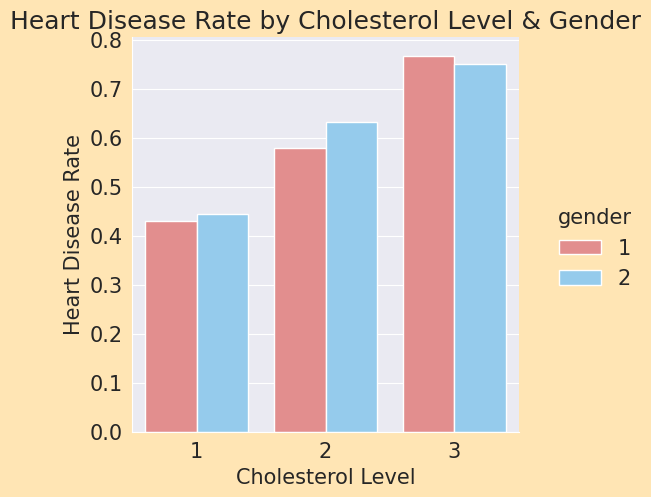

In [83]:
sns.catplot(
    data=df, x="cholesterol", y="cardio", hue="gender", kind="bar", ci=None,
    palette=["lightcoral", "lightskyblue"]
)
plt.title("Heart Disease Rate by Cholesterol Level & Gender")
plt.xlabel("Cholesterol Level")
plt.ylabel("Heart Disease Rate")
plt.show()


- there's no significant relation

### 8. Which factor (age, cholesterol, blood pressure, smoking, etc.) seems the strongest predictor of heart disease, based on your analysis?


- from previous Analysis the blood preseure is the most significant relation

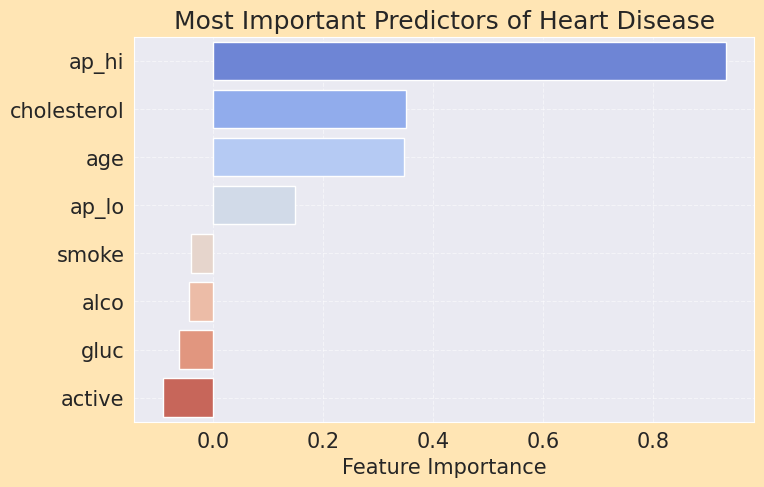

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Selecting features and target variable
features = ["age", "cholesterol", "ap_hi", "ap_lo", "gluc", "smoke", "alco", "active"]
X = df[features]
y = df["cardio"]

# Standardizing the features (important for coefficient comparison)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training logistic regression model
model = LogisticRegression()
model.fit(X_scaled, y)

# Getting feature importance
feature_importance = pd.Series(model.coef_[0], index=features).sort_values(ascending=False)

# Plot the feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="coolwarm")
plt.xlabel("Feature Importance")
plt.title("Most Important Predictors of Heart Disease")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


- we saw that in our previous work

###  9. Are there any surprising or less-common factors in the data that might still have a measurable impact on CVD?

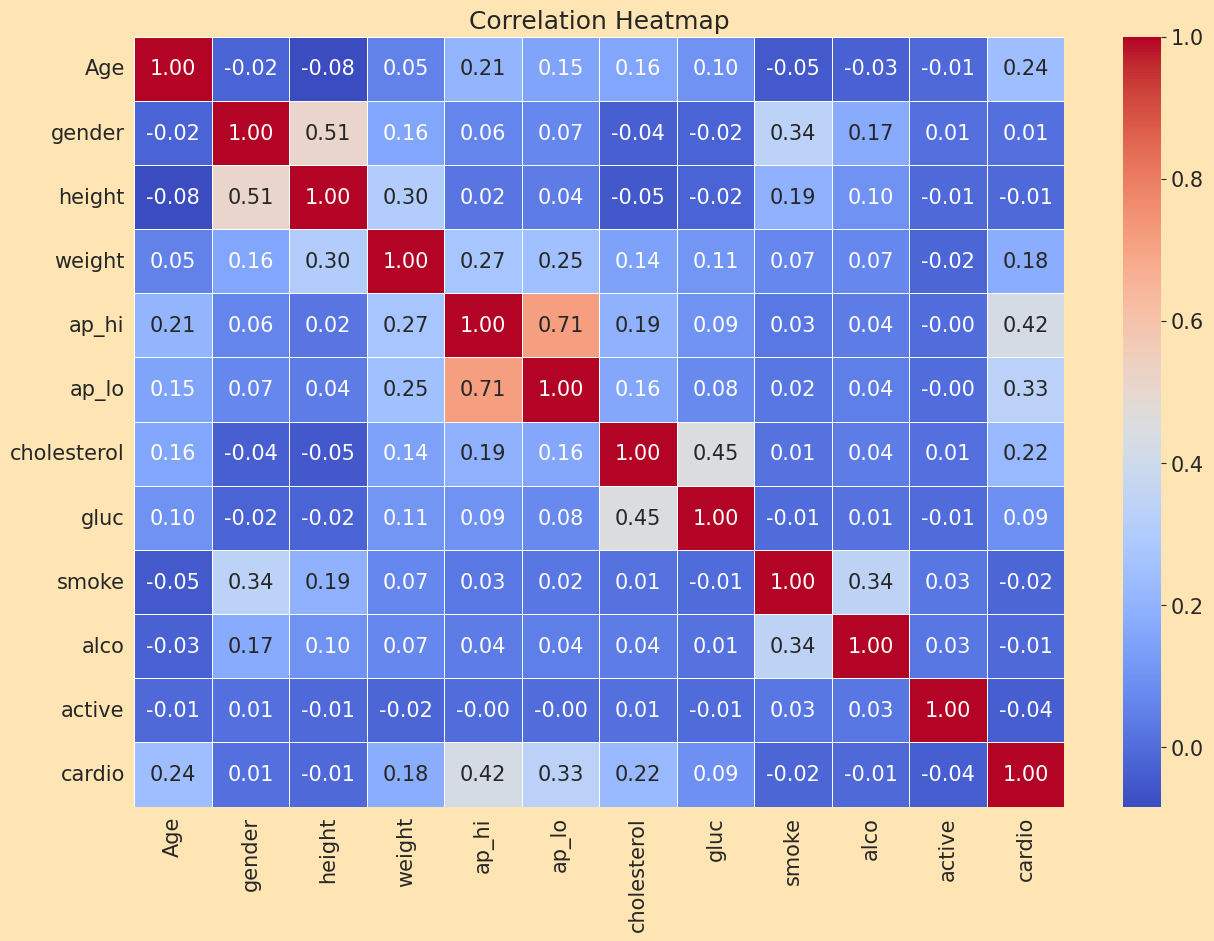

In [85]:
selected_columns = ['Age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 
                    'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
corr_matrix = df[selected_columns].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()

- the relationsips isn't that strong

### 10. Is Alcohol matter?

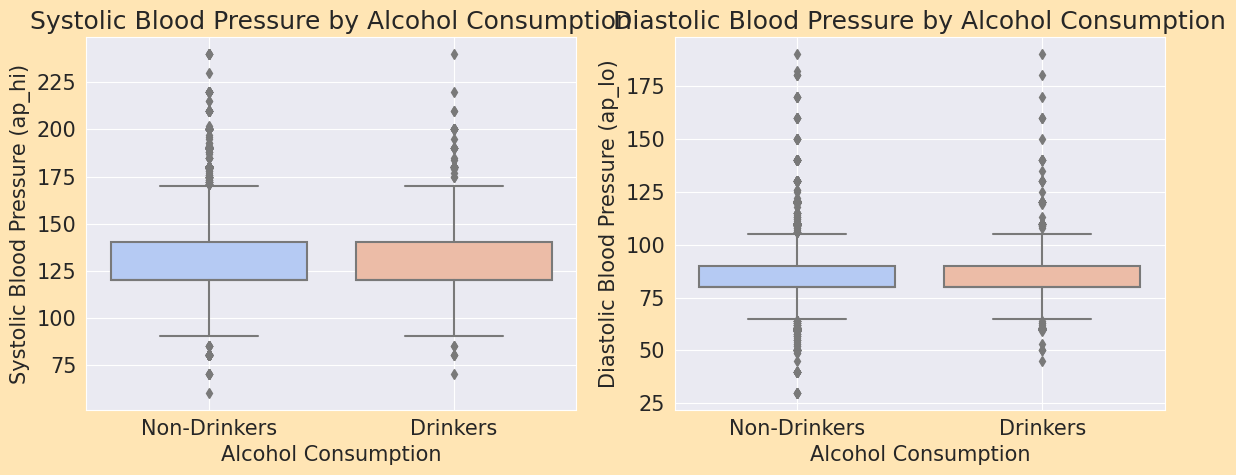

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Systolic Blood Pressure (ap_hi)
sns.boxplot(x=df["alco"], y=df["ap_hi"], palette="coolwarm", ax=axes[0])
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["Non-Drinkers", "Drinkers"])
axes[0].set_xlabel("Alcohol Consumption")
axes[0].set_ylabel("Systolic Blood Pressure (ap_hi)")
axes[0].set_title("Systolic Blood Pressure by Alcohol Consumption")
axes[0].grid(True)

# Diastolic Blood Pressure (ap_lo)
sns.boxplot(x=df["alco"], y=df["ap_lo"], palette="coolwarm", ax=axes[1])
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["Non-Drinkers", "Drinkers"])
axes[1].set_xlabel("Alcohol Consumption")
axes[1].set_ylabel("Diastolic Blood Pressure (ap_lo)")
axes[1].set_title("Diastolic Blood Pressure by Alcohol Consumption")
axes[1].grid(True)

plt.tight_layout()
plt.show()


- Most alchol drinkers have hight blood pressure

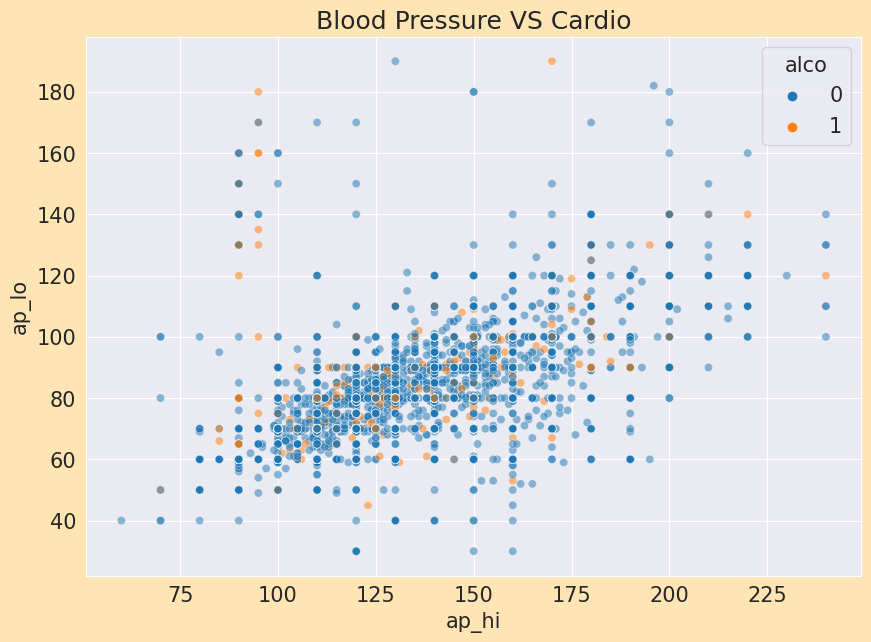

In [87]:
sns.scatterplot(x=df['ap_hi'], y=df['ap_lo'], hue=df['alco'], alpha=0.5)
plt.title("Blood Pressure VS Cardio")
plt.show()


- looks like kinda strong

### overall stats

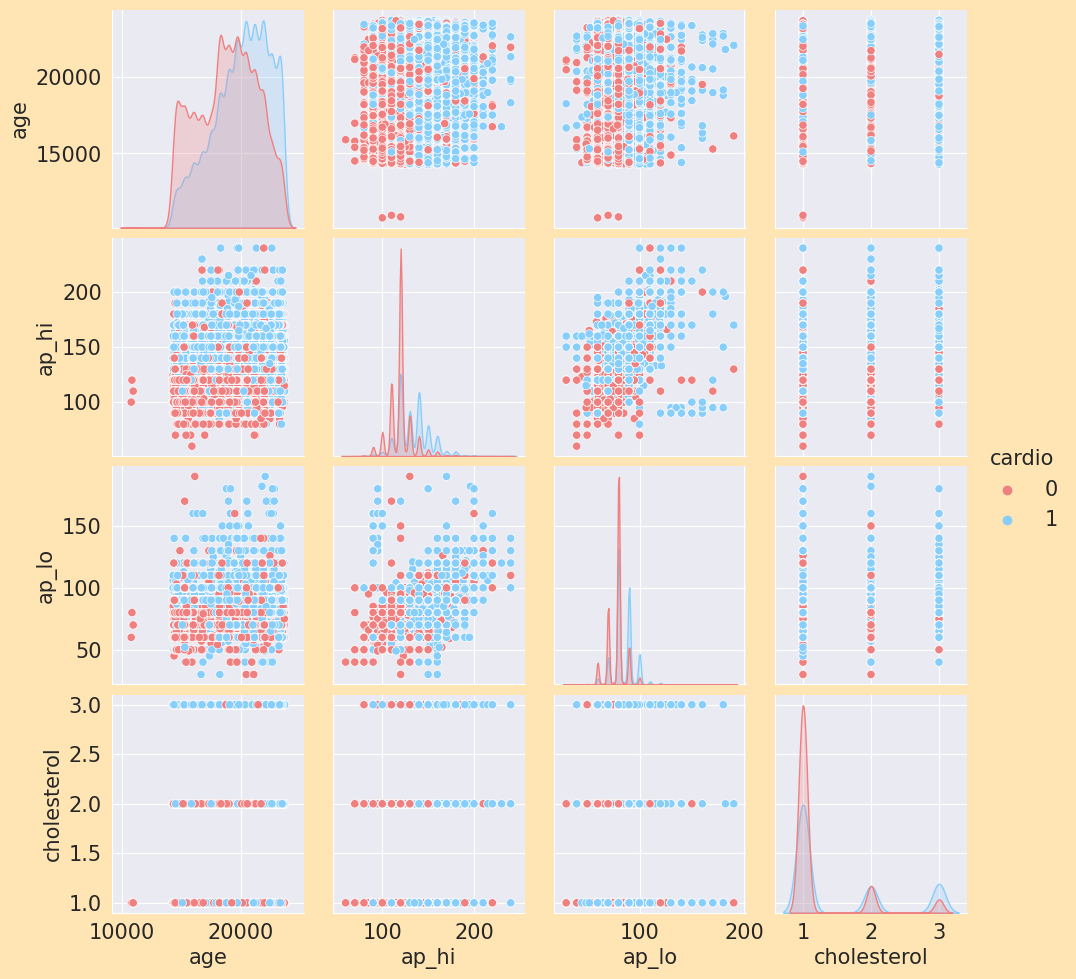

In [88]:
sns.pairplot(df, vars=["age", "ap_hi", "ap_lo", "cholesterol"], hue="cardio", palette={0: "lightcoral", 1: "lightskyblue"})
plt.show()

# Data PreProcessing

In [89]:
backup=df.copy()

In [90]:
# 2. Calculate BMI
df['height'] = df['height'] / 100
df['bmi'] = df['weight'] / (df['height']** 2)

In [91]:
df.drop(['id', 'age', 'age_group'], inplace=True,axis=1)

In [92]:
df.drop(['height', 'weight'], inplace=True,axis=1)

In [93]:
df.sample()

gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio  \
15078       2    120     80            1     1      0     0       1       0   

       Age       bmi  
15078   50  20.74755

In [94]:

test_size = 0.2
random_state = 42

X = df.drop('cardio', axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state, stratify=y
)

# Data Modeling

### evaluate models

In [95]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred_proba)
    
    # Print results
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # Return the model and metrics
    return {
        'model': model,
        'name': model_name,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1,
        'roc_auc': roc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

# Initialize results list to store all model results
results = []

### models bilding


Logistic Regression Results:
Accuracy: 0.7267
Precision: 0.7529
Recall: 0.6667
F1 Score: 0.7072
ROC AUC: 0.7868


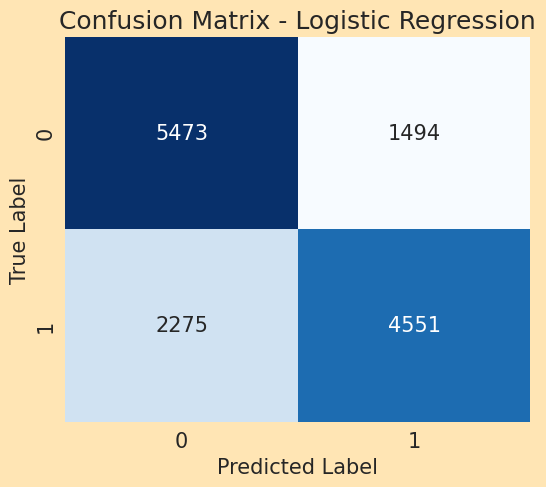

In [96]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_result = evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Logistic Regression")
results.append(lr_result)


K-Nearest Neighbors Results:
Accuracy: 0.6887
Precision: 0.6919
Recall: 0.6686
F1 Score: 0.6801
ROC AUC: 0.7371


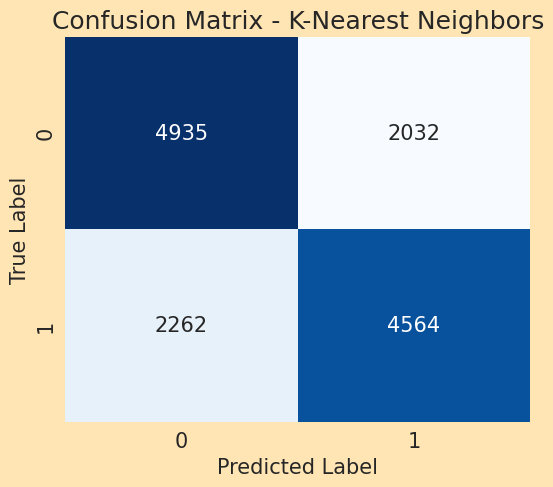

In [97]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_result = evaluate_model(knn_model, X_train, X_test, y_train, y_test, "K-Nearest Neighbors")
results.append(knn_result)

In [98]:
Support Vector Machine
#svm_model = SVC(probability=True, random_state=42)
#svm_result = evaluate_model(svm_model, X_train, X_test, y_train, y_test, "SVM")
#results.append(svm_result)


Decision Tree Results:
Accuracy: 0.6395
Precision: 0.6409
Recall: 0.6175
F1 Score: 0.6290
ROC AUC: 0.6389


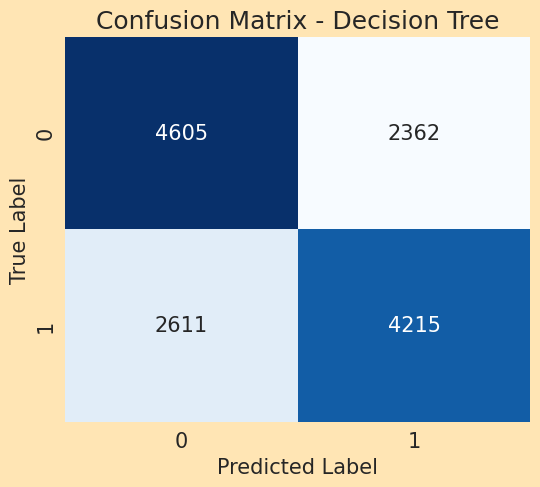

In [99]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_result = evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree")
results.append(dt_result)


Random Forest Results:
Accuracy: 0.6799
Precision: 0.6756
Recall: 0.6795
F1 Score: 0.6775
ROC AUC: 0.7402


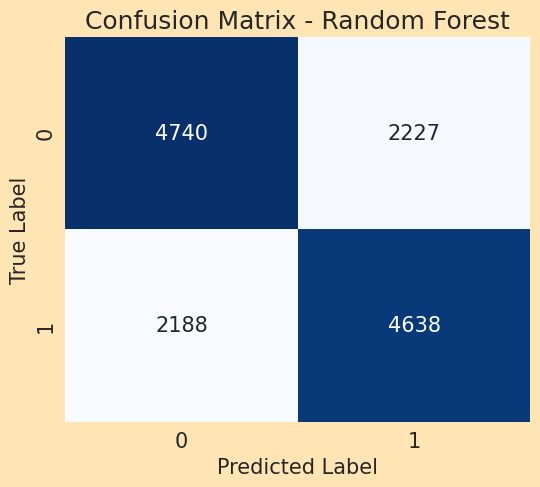

In [100]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_result = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")
results.append(rf_result)


Gradient Boosting Results:
Accuracy: 0.7356
Precision: 0.7542
Recall: 0.6909
F1 Score: 0.7212
ROC AUC: 0.7966


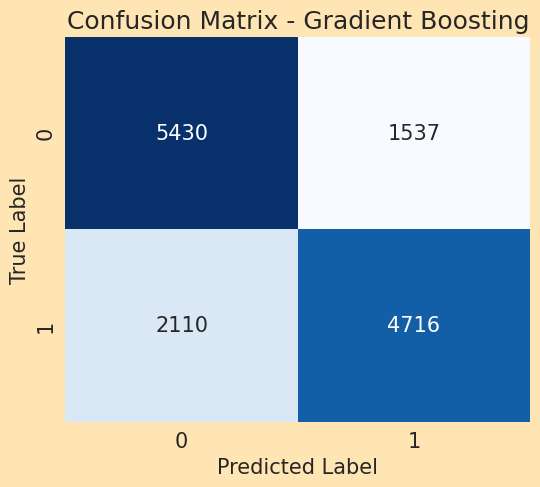

In [101]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_result = evaluate_model(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting")
results.append(gb_result)


Gradient Boosting Results:
Accuracy: 0.7356
Precision: 0.7542
Recall: 0.6909
F1 Score: 0.7212
ROC AUC: 0.7966


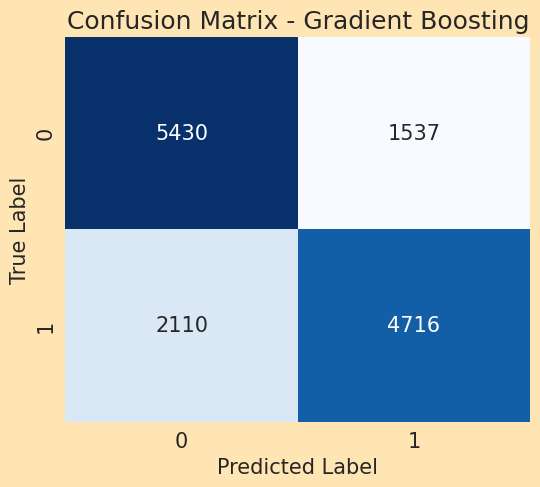

In [102]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_result = evaluate_model(gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting")
results.append(gb_result)


Gaussian Naive Bayes Results:
Accuracy: 0.7044
Precision: 0.7551
Recall: 0.5961
F1 Score: 0.6662
ROC AUC: 0.7711


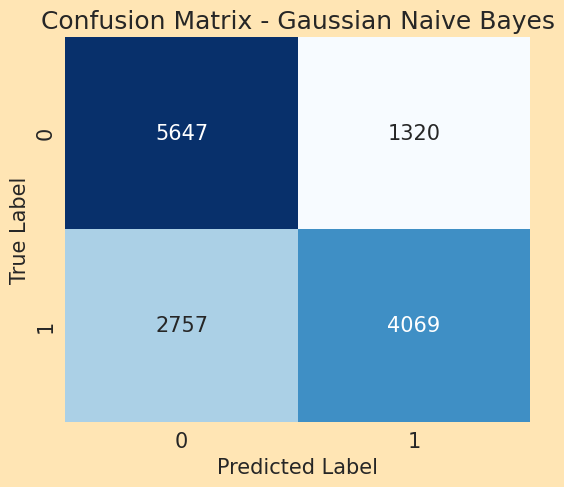

In [103]:
# Gaussian Naive Bayes
nb_model = GaussianNB()
nb_result = evaluate_model(nb_model, X_train, X_test, y_train, y_test, "Gaussian Naive Bayes")
results.append(nb_result)


Gaussian Naive Bayes Results:
Accuracy: 0.7044
Precision: 0.7551
Recall: 0.5961
F1 Score: 0.6662
ROC AUC: 0.7711


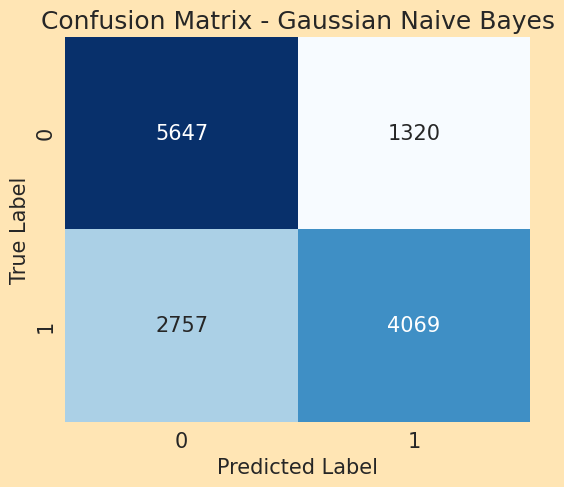

In [104]:
# Gaussian Naive Bayes
nb_model = GaussianNB()
nb_result = evaluate_model(nb_model, X_train, X_test, y_train, y_test, "Gaussian Naive Bayes")
results.append(nb_result)


XGBoost Results:
Accuracy: 0.7314
Precision: 0.7484
Recall: 0.6888
F1 Score: 0.7174
ROC AUC: 0.7907


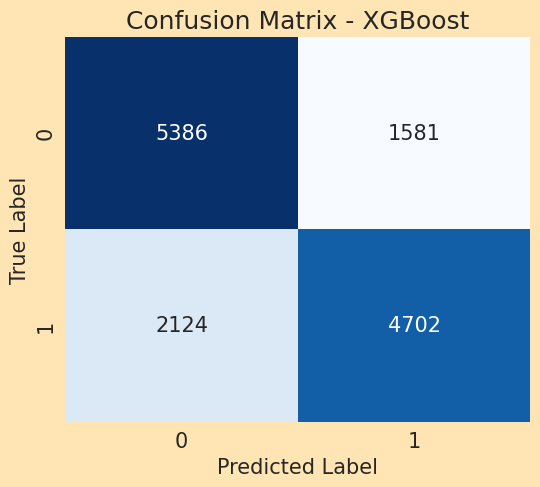

In [105]:
# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_result = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")
results.append(xgb_result)

[LightGBM] [Info] Number of positive: 27301, number of negative: 27867
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 463
[LightGBM] [Info] Number of data points in the train set: 55168, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494870 -> initscore=-0.020520
[LightGBM] [Info] Start training from score -0.020520

LightGBM Results:
Accuracy: 0.7355
Precision: 0.7558
Recall: 0.6878
F1 Score: 0.7202
ROC AUC: 0.7966


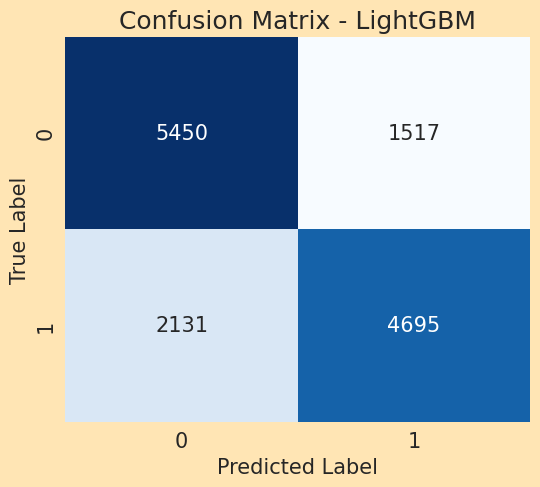

In [106]:
# LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_result = evaluate_model(lgb_model, X_train, X_test, y_train, y_test, "LightGBM")
results.append(lgb_result)

In [107]:
# Create a DataFrame to compare all models
comparison_df = pd.DataFrame([
    {
        'Model': result['name'],
        'Accuracy': result['accuracy'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1 Score': result['f1'],
        'ROC AUC': result['roc_auc']
    } for result in results
])

# Sort by ROC AUC (you can change to another metric if preferred)
comparison_df = comparison_df.sort_values('ROC AUC', ascending=False).reset_index(drop=True)

print("\n=== Model Comparison ===")
print(comparison_df)

# Get the best model (based on ROC AUC)
best_model_name = comparison_df.iloc[0]['Model']
best_model_result = next(result for result in results if result['name'] == best_model_name)
best_model = best_model_result['model']
print(f"\nBest Model: {best_model_name}")


=== Model Comparison ===
                  Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0              LightGBM  0.735518   0.755795  0.687811  0.720202  0.796568
1     Gradient Boosting  0.735591   0.754198  0.690888  0.721156  0.796552
2     Gradient Boosting  0.735591   0.754198  0.690888  0.721156  0.796552
3               XGBoost  0.731385   0.748369  0.688837  0.717370  0.790724
4   Logistic Regression  0.726745   0.752854  0.666715  0.707171  0.786786
5  Gaussian Naive Bayes  0.704415   0.755057  0.596103  0.666230  0.771111
6  Gaussian Naive Bayes  0.704415   0.755057  0.596103  0.666230  0.771111
7         Random Forest  0.679910   0.675601  0.679461  0.677525  0.740225
8   K-Nearest Neighbors  0.688683   0.691935  0.668620  0.680077  0.737061
9         Decision Tree  0.639455   0.640870  0.617492  0.628964  0.638947

Best Model: LightGBM


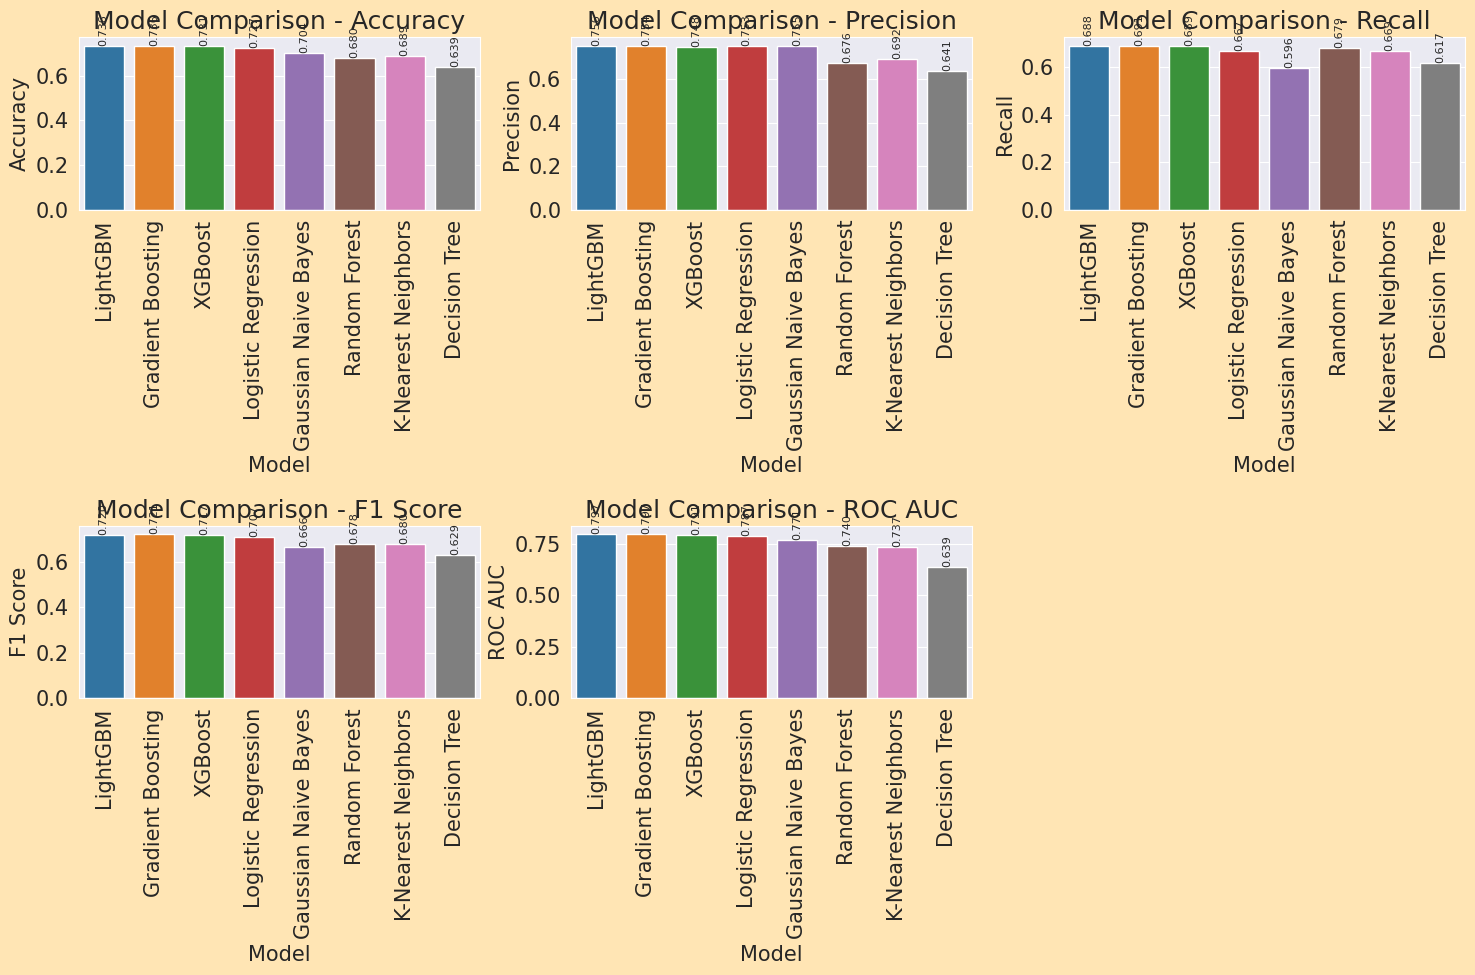

In [108]:
# Plot metrics comparison
plt.figure(figsize=(15, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    ax = sns.barplot(x='Model', y=metric, data=comparison_df)
    plt.xticks(rotation=90)
    plt.title(f'Model Comparison - {metric}')
    
    # Add value labels on top of bars
    for j, p in enumerate(ax.patches):
        ax.annotate(f'{p.get_height():.3f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'bottom',
                    rotation=90, size=8)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

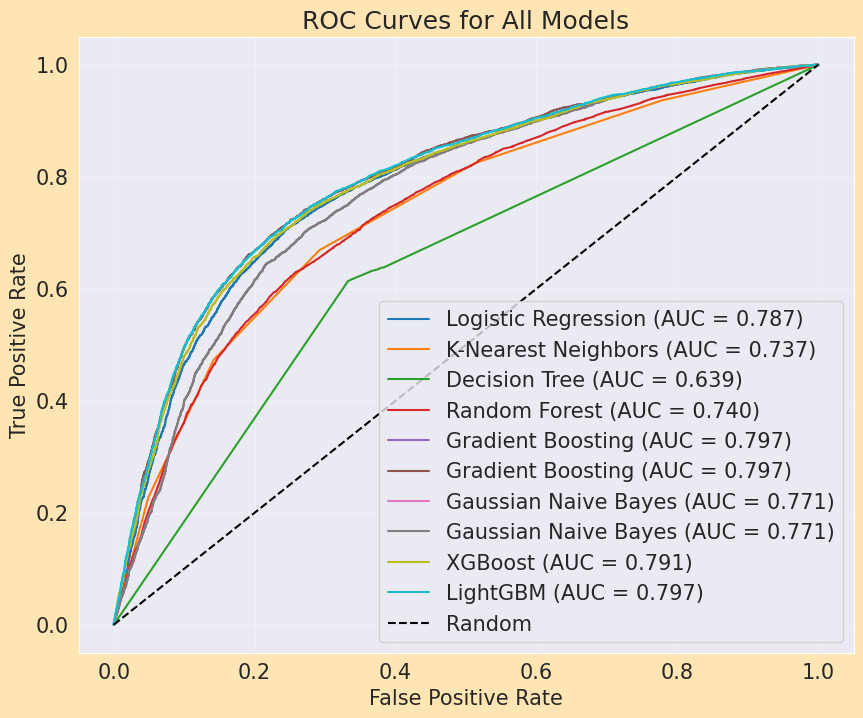

In [109]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

for result in results:
    # Skip if the model doesn't have probabilities (though all should)
    if 'probabilities' not in result:
        continue
        
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    plt.plot(fpr, tpr, label=f"{result['name']} (AUC = {result['roc_auc']:.3f})")

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()


=== Feature Importance Analysis ===


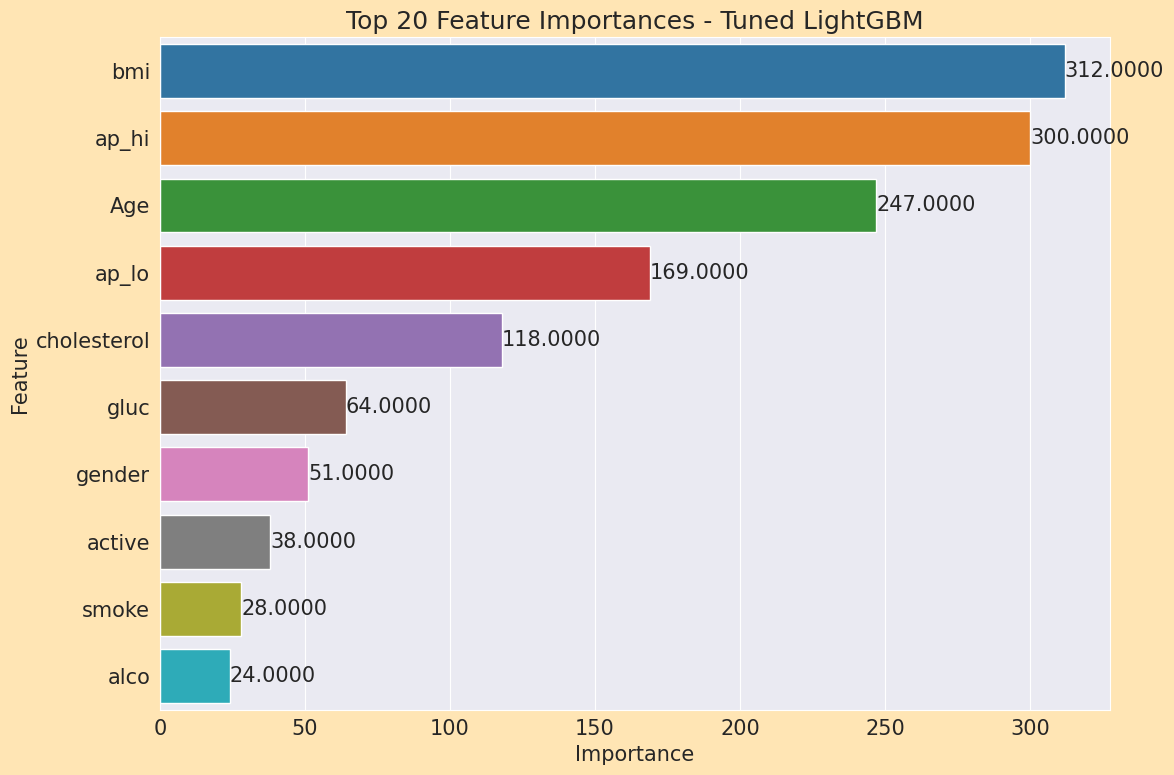


Top 10 Most Important Features:
       Feature  Importance
0          bmi         312
1        ap_hi         300
2          Age         247
3        ap_lo         169
4  cholesterol         118
5         gluc          64
6       gender          51
7       active          38
8        smoke          28
9         alco          24


In [111]:
# Feature importance analysis
def get_feature_importance(model, feature_names, model_name):
    importances = None
    
    # For tree-based models that have feature_importances_ attribute
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    
    # For linear models with coefficients
    elif hasattr(model, 'coef_'):
        importances = np.abs(model.coef_[0]) if model.coef_.ndim > 1 else np.abs(model.coef_)
    
    # If we found importances
    if importances is not None:
        # Create a DataFrame with feature importances
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        })
        # Sort by importance
        importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
        
        # Plot feature importances
        plt.figure(figsize=(12, 8))
        ax = sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
        
        # Add value labels
        for i, p in enumerate(ax.patches):
            width = p.get_width()
            plt.text(width + 0.002, p.get_y() + p.get_height()/2, f'{width:.4f}', ha='left', va='center')
            
        plt.title(f'Top 20 Feature Importances - {model_name}')
        plt.tight_layout()
        plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return importance_df
    else:
        print(f"Feature importance not available for {model_name}")
        return None

# Get feature importance for the best model
print("\n=== Feature Importance Analysis ===")
feature_names = X_train.columns
importance_df = get_feature_importance(best_model, feature_names, best_model_name)

if importance_df is not None:
    print("\nTop 10 Most Important Features:")
    print(importance_df.head(10))


=== Final Classification Report ===
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6967
           1       0.75      0.70      0.72      6826

    accuracy                           0.74     13793
   macro avg       0.74      0.74      0.74     13793
weighted avg       0.74      0.74      0.74     13793


=== Cross-Validated Performance ===
[LightGBM] [Info] Number of positive: 27301, number of negative: 27867
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 463
[LightGBM] [Info] Number of data points in the train set: 55168, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494870 -> initscore=-0.020520
[LightGBM] [Info] Start training from score -0.020520
[LightGBM] [Warning] No further splits wit

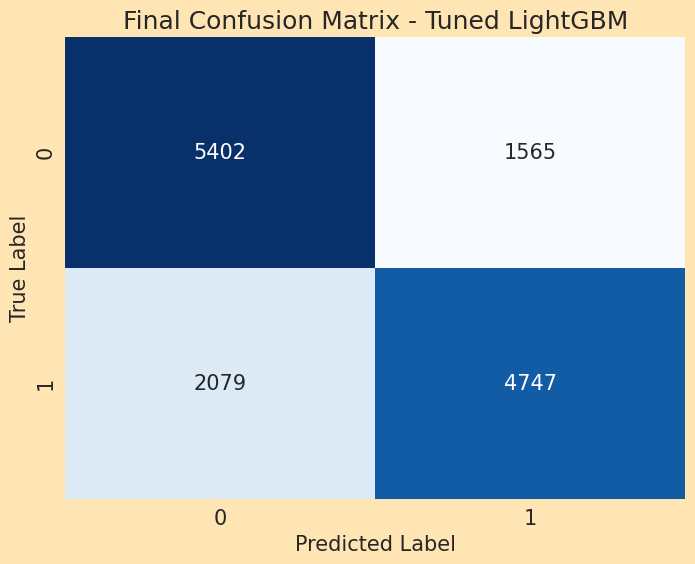

In [112]:
# Final classification report
print("\n=== Final Classification Report ===")
print(classification_report(y_test, best_model_result['predictions']))

# Calculate cross-validated performance
print("\n=== Cross-Validated Performance ===")
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(f"5-fold Cross-Validation ROC AUC: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Plot final confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, best_model_result['predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Final Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('final_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [113]:
df.sample()

gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  active  cardio  \
34260       2    120     80            1     1      0     0       0       0   

       Age        bmi  
34260   47  17.850623